# **SECTION 0: imports**
- import PCA (run once per runtime)

In [ ]:

#@title IMPORT vqpca from PCAfold
%cd /content
!git clone http://gitlab.multiscale.utah.edu/common/PCAfold.git
%cd PCAfold
!python setup.py build_ext --inplace
!python -m pip install .

from PCAfold import VQPCA


# **SECTION 1: functions**
- functions (run once per runtime)

In [ ]:
#@title FUNCTION 1: assign the points in original space to the predicted cluster indeces from vqpva
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import PCAfold
%cd /content

def assign_3D_points_to_clusters(data_points, cluster_indices, title, x_axis, y_axis, z_axis):

    # Separate the data points for each cluster
    clusters = {}
    for i, cluster_index in enumerate(cluster_indices):
        if cluster_index not in clusters:
            clusters[cluster_index] = []
        clusters[cluster_index].append(data_points[i])

    # Plot each cluster with a different color
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for cluster_index, points in clusters.items():
        x_vals, y_vals, z_vals = zip(*points)
        ax.scatter(x_vals, y_vals, z_vals, label=f"Cluster {cluster_index}")

    # Customize the plot
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.ylabel(z_axis)
    # plt.title(title)
    plt.legend()
    plt.grid(True)

    # Display the plot
    plt.show()


# function to assign the points in original space to clusters
def assign_2D_points_to_clusters(data_points, cluster_indices, title, x_axis, y_axis, z_axis):

    # Separate the data points for each cluster
    clusters = {}
    for i, cluster_index in enumerate(cluster_indices):
        if cluster_index not in clusters:
            clusters[cluster_index] = []
        clusters[cluster_index].append(data_points[i])

    # Plot each cluster with a different color
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for cluster_index, points in clusters.items():
        x_vals, y_vals = zip(*points)
        ax.scatter(x_vals, y_vals, label=f"Cluster {cluster_index}")

    # Customize the plot
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.ylabel(z_axis)
    # plt.title(title)
    plt.legend()
    plt.grid(True)

    # Display the plot
    plt.show()

/content


In [ ]:
#@title FUNCTION 2: executes vqpca from PCAfold and returns predicted labels

def get_2D_pred_labels(source, title, clus, dim):
  # Load the .csv file into a NumPy array.
  data = np.loadtxt(source, delimiter=",")

  # Create a PCAfold object and specify the number of components to retain.
  vqpca = VQPCA(data, n_clusters=clus, n_components=dim)
  print(f' & k = {clus} & l = {dim}')

  # Access the VQPCA clustering solution:
  idx = np.array(vqpca.idx)

  # assign the points in original space to clusters by indeces from idx (the VQPCA result)
  assign_2D_points_to_clusters(data, idx, title,'x', 'y', 'z')

  return idx

def get_3D_pred_labels(source, title, clus, dim):
  # Load the .csv file into a NumPy array.
  data = np.loadtxt(source, delimiter=",")

  # Create a PCAfold object and specify the number of components to retain.
  vqpca = VQPCA(data, n_clusters=clus, n_components=dim)
  print(f' & k = {clus} & l = {dim}')

  # Access the VQPCA clustering solution:
  idx = np.array(vqpca.idx)

  # assign the points in original space to clusters by indeces from idx (the VQPCA result)
  assign_3D_points_to_clusters(data, idx, title,'x', 'y', 'z')

  return idx

In [ ]:
#@title FUNCTION 3: returns ARRAY of predicted labels from multiple (for different random seeds) vqpca runs (parameters unchanged)

def loop_vqpca_2D(runs, source, title, clus, dim):
  run = 0
  predicted_labels_array = [None] * runs
  while(run < runs):
    print(f'run : {run}')
    predicted_labels_array[run] = (get_2D_pred_labels(source, title, clus, dim))
    run+=1
  return predicted_labels_array

def loop_vqpca_3D(runs, source, title, clus, dim):
  run = 0
  predicted_labels_array = [None] * runs
  while(run < runs):
    print(f'run : {run}')
    predicted_labels_array[run] = (get_3D_pred_labels(source, title, clus, dim))
    run+=1
  return predicted_labels_array

In [ ]:
#@title FUNCTION 4: prints ARI & NMI scores

def print_ARI_NMI_scores_vqpca(tru_labels, pred_array, runs, title):
  nmi_scores_array = [None] * runs
  ari_scores_array = [None] * runs
  titles_array = [None] * runs

  for i in range(runs):
    ari_scores_array[i] = round(adjusted_rand_score(tru_labels, pred_array[i]),2)
    nmi_scores_array[i] = round(normalized_mutual_info_score(tru_labels, pred_array[i]),2)
    titles_array[i] = title
    print(f'run {i}, {title}:')
    print(f'ARI: {round(ari_scores_array[i], 2)}')
    print(f'NMI: {round(nmi_scores_array[i], 2)}')

  print(f' best ARI:, best NMI:, worst tARI:, worst NMI: ')
  print(f' & {max(ari_scores_array)} & {max(nmi_scores_array)} & {min(ari_scores_array)} & {min(nmi_scores_array)} \\ ')
  nmi_scores_array = ["NMI score"] + nmi_scores_array
  ari_scores_array = ["ANI score"] + ari_scores_array
  titles_array = ["datasets"] + titles_array
  return zip(titles_array, ari_scores_array, nmi_scores_array)

# **SECTION 2: data**
- generate datasets

In [ ]:
#@title (1) high linearity 2D + csv + ground-truth labels
import numpy as np
import matplotlib.pyplot as plt
import csv
%cd /content
!mkdir truth
%cd /content/truth

# Generate cluster
cluster = np.random.randn(25, 2) * 5
cluster[:,0] += 25
# Plot the cluster
plt.plot(cluster[:, 0], cluster[:, 1], '.')

# Generate points that have high linearity
x = np.linspace(0, 100, 100)
y = 2 * x + 5
# Add some jitter to the points
y += np.random.normal(0, 3, 100)

x2 = np.linspace(45, 100, 100)
y2 = 2 * x2 -55
y2 += np.random.normal(0, 6, 100)

plt.plot(x, y, '.')
plt.plot(x2, y2, '.')

plt.title('Linear Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.savefig("lin2d.png")


# Concat x-coordinates
x_coords = np.concatenate([x, x2, cluster[:, 0]])

# Concat y-coordinates
y_coords = np.concatenate([y, y2, cluster[:, 1]])

# Save to CSV file WITHOUT labels
with open('2D linearity.csv', 'w') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerows(zip(x_coords, y_coords))

true_labels_lin_2d = []

for i in range(len(x)):
 true_labels_lin_2d.append(0)

for i in range(len(x2)):
  true_labels_lin_2d.append(1)

for i in range(len(cluster[:, 0])):
  true_labels_lin_2d.append(2)

# Save to CSV file WITH labels
with open('2D linearity + labels.csv', 'w') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerows(zip(true_labels_lin_2d, x_coords, y_coords))


In [ ]:
#@title (2) jitter & noise 3D + csv + ground-truth labels
import numpy as np
import matplotlib.pyplot as plt
import csv

# Generate first orange linear cluster
x = np.linspace(0, 100, 100)
x -= 50
y = 0.3 * x + 80
z = -15 * x - 10
# Add lots of jitter to the points
y += np.random.normal(0, 50, 100)
z += np.random.normal(0, 40, 100)

# Generate second green linear cluster
x2 = np.linspace(80, 180, 100)
x2 += 50
y2 = 2 * x2 - 300
z2 = 3 * x2 - 300
# Add lots of jitter to the points
y2 += np.random.normal(0, 100, 100)
z2 += np.random.normal(0, 100, 100)


# Generate noise points
noise1 = np.random.uniform(-400, 500, (50, 3))

# Plot the points in 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(noise1[:, 0], noise1[:, 1], noise1[:, 2], '.')
ax.scatter(x, y, z, '.')
ax.scatter(x2, y2, z2, '.')


# Add a title and labels to the axes
plt.title('Jittery Clusters with Noise')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()
plt.savefig("jitter.png")


x_coords = np.concatenate([x, noise1[:, 0], x2])
y_coords = np.concatenate([y, noise1[:, 1], y2])
z_coords = np.concatenate([z, noise1[:, 2], z2])

print(len(x))
print(len(noise1[:, 0]))
print(len(x2))

# Save to CSV file WITHOUT labels
with open('3D jitter noise.csv', 'w') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerows(zip(x_coords, y_coords, z_coords))

# create truth labels
true_labels_jitter = []

for i in range(len(x)):
 true_labels_jitter.append(0)

for i in range(len(x2)):
  true_labels_jitter.append(1)

for i in range(len(noise1[:, 0])):
 true_labels_jitter.append(2)

# Save to CSV file WITH labels
with open('3D jitter noise + labels.csv', 'w') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerows(zip(true_labels_jitter, x_coords, y_coords, z_coords))


In [ ]:
#@title (3) linearity plane 3D + csv + ground-truth labels
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv

start = 0
end = 50
jump = 20
items = 9
points = 100

# Generate multiple parallel correlations that have some linearity
X =[None] * items
Y =[None] * items
Z =[None] * items

for i in range(items):
  X[i] = np.linspace(start, end, points)
  Y[i] = -1 * X[i] +500
  Z[i] = -2 * X[i] + 222
  # Add jitter to the points
  X[i] += np.random.normal(0, 3, points)
  Y[i] += np.random.normal(0, 3, points)
  Z[i] += np.random.normal(0, 4, points)
  start += jump
  end += jump

# Generate the parallel correlations in 3D
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(items):
  y_offset = 22 * i
  Y[i] = Y[i] + y_offset
  ax.plot(X[i], Y[i], Z[i], ".")

ax.set_zlabel('z')
plt.title('Nested Linearity')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.savefig("plane.png")


x_coords = []
y_coords = []
z_coords = []

for i in range(items):
  x_coords = np.concatenate([x_coords, X[i]])
  y_coords = np.concatenate([y_coords, Y[i]])
  z_coords = np.concatenate([z_coords, Z[i]])


# Save to CSV file WITHOUT labels
with open('3D linearity plane.csv', 'w') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerows(zip(x_coords, y_coords, z_coords))

# truth labels
true_labels_plane = []
for e in range(len(X)):
  for i in range(len(X[0])):
    true_labels_plane.append(e)
print(len(true_labels_plane))
print(len(x_coords))

# Save to CSV file WITH labels
with open('3D linearity plane + labels.csv', 'w') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerows(zip(true_labels_plane, x_coords, y_coords, z_coords))


In [ ]:
#@title (4) linearity & uniformity 3D + csv + ground-truth labels
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv

# Generate points that have high linearity
x1 = np.linspace(0, 100, 100)
y1 = 2 * x1 + 5
y1 += np.random.normal(0, 3, 100)
z1 = 2 * x1 + 5
z1 += np.random.normal(0, 3, 100)

x2 = np.linspace(100, 150, 100)
y2 = 2 * x2 - 155
y2 += np.random.normal(0, 6, 100)
z2 = 2 * x2 - 155
z2 += np.random.normal(0, 6, 100)

# Generate points that have high uniformity
x = np.random.uniform(-25, 200, 200)
y = np.random.uniform(-25, 200, 200)
z = np.random.uniform(-25, 200, 200)

# Plot the points in 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, '.')
ax.scatter(x1, y1, z1, '.')
ax.scatter(x2, y2, z2, '.')


# Add a title and labels to the axes
plt.title('High Uniformity')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()
plt.savefig("unif.png")

print(len(x))
print(len(x1))
print(len(x2))
x_coords = np.concatenate([x, x1, x2])
y_coords = np.concatenate([y, y1, y2])
z_coords = np.concatenate([z, z1, z2])

# Save to CSV file WITHOUT labels
with open('3D linearity uniformity.csv', 'w') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerows(zip(x_coords, y_coords, z_coords))

# create truth labels
true_labels_unif = []

for i in range(len(x1)):
 true_labels_unif.append(0)

for i in range(len(x2)):
  true_labels_unif.append(1)

for i in range(len(x)):
 true_labels_unif.append(2)

# Save to CSV file WITH labels
with open('3D linearity uniformity + labels.csv', 'w') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerows(zip(true_labels_unif, x_coords, y_coords, z_coords))

In [ ]:
#@title (5) linearity & cluster blob 3D + csv + ground-truth

import numpy as np
import matplotlib.pyplot as plt
import csv

amount = 3
spread_var = 10
points_var = 200
CLUSTERS = [None] * amount
points = [None] * amount
spread = [None] * amount

for i in range(amount):
  points[i] =  1 + i * points_var
  spread[i] =  1 + i * spread_var

# Generate points that have high linearity
x1 = np.linspace(0, 100, points_var)
y1 = 2 * x1 + 5
y1 += np.random.normal(0, 3, points_var)
z1 = 2 * x1 + 5
z1 += np.random.normal(0, 3, points_var)

print(len(x1))

x2 = np.linspace(100, 150, points_var)
y2 = 2 * x2 - 155
y2 += np.random.normal(0, 6, points_var)
z2 = 2 * x2 - 155
z2 += np.random.normal(0, 6, points_var)

print(len(x2))


# Plot the points in 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(amount):
  CLUSTERS[i] = np.random.randn(points[i], 3) * spread[i]
  CLUSTERS[i][:,0] += 60
  CLUSTERS[i][:,1] += 80
  CLUSTERS[i][:,2] += 100
  ax.scatter(CLUSTERS[i][:,0], CLUSTERS[i][:,1], CLUSTERS[i][:,2], '.')
ax.scatter(x1, y1, z1, '.')
ax.scatter(x2, y2, z2, '.')


print(len(CLUSTERS[0]))
print(len(CLUSTERS[1]))
print(len(CLUSTERS[2]))

# print(len(CLUSTERS))

plt.title('Linearity + Cluster Blob')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.savefig("blob.png")

x_coords = np.concatenate([x1, x2])
y_coords = np.concatenate([y1, y2])
z_coords = np.concatenate([z1, z2])

for i in range(amount-1, 0, -1):
  x_coords = np.concatenate([x_coords, CLUSTERS[i][:,0]])
  y_coords = np.concatenate([y_coords, CLUSTERS[i][:,1]])
  z_coords = np.concatenate([z_coords, CLUSTERS[i][:,2]])


# Save to CSV file WITHOUT labels
with open('3D linearity blob.csv', 'w') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerows(zip(x_coords, y_coords, z_coords))

# create truth labels
true_labels_blob = []

for i in range(len(x1)):
 true_labels_blob.append(0)

for i in range(len(x2)):
  true_labels_blob.append(1)

for i in range(len(CLUSTERS[1])):
 true_labels_blob.append(2)

for i in range(len(CLUSTERS[2])):
 true_labels_blob.append(3)

# for i in range(len(CLUSTERS[3])):
#  true_labels_blob.append(4)
print(len(true_labels_blob))
# Save to CSV file WITH labels
with open('3D linearity blob + labels.csv', 'w') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerows(zip(true_labels_blob, x_coords, y_coords, z_coords))

%cd /content


# **SECTION 3: vqpca on data**
- execute the functions on the generated datasets

In [ ]:
#@title (1) true_labels_lin_2d
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_rand_score

dataset_title = ["dataset_title"]
ARI_score = ["ARI_score"]
NMI_score =["NMI_score"]

runs = 20

# 3 clusters, thus k = 3
lin_2d_source = "/content/truth/2D linearity.csv"
lin_2d_title = "VQPCA result for 2D linearity"
lin_2d_k = 3
lin_2d_l = 1
pred_labels_lin_2d_array = loop_vqpca_2D(runs, lin_2d_source, lin_2d_title, lin_2d_k, lin_2d_l)

%cd /content
!mkdir lin2d
%cd /content/lin2d

with open(f'2D linearity scores, k = {lin_2d_k}, l = {lin_2d_l}.csv', 'w') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerows(print_ARI_NMI_scores_vqpca(true_labels_lin_2d, pred_labels_lin_2d_array, runs, "VQPCA, lin_2D, k3, l1"))

In [ ]:
#@title (2) true_labels_jitter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_rand_score
import csv

dataset_title = ["dataset_title"]
ARI_score = ["ARI_score"]
NMI_score =["NMI_score"]

runs = 20

# 2 clusters, thus k = 2
jitter_source = "/content/truth/3D jitter noise.csv"
jitter_title = "VQPCA result for Jitter & Noise"
jitter_k = 3
jitter_l = 2
pred_labels_jitter_array = loop_vqpca_3D(runs, jitter_source, jitter_title, jitter_k, jitter_l)

%cd /content
!mkdir jitter
%cd /content/jitter

with open(f'3D jitter scores, k = {jitter_k}, l = {jitter_l}.csv', 'w') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerows(print_ARI_NMI_scores_vqpca(true_labels_jitter, pred_labels_jitter_array, runs, "VQPCA, jitter & noise"))

In [ ]:
#@title (3) true_labels_plane
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_rand_score

dataset_title = ["dataset_title"]
ARI_score = ["ARI_score"]
NMI_score =["NMI_score"]

runs = 5

# 9 clusters, thus k = 9
plane_source = "/content/truth/3D linearity plane.csv"
plane_title ="VQPCA result for Linearity Plane"
plane_k = 9
plane_l = 2
pred_labels_plane_array = loop_vqpca_3D(runs, plane_source, plane_title, plane_k, plane_l)

%cd /content
!mkdir plane
%cd /content/plane

with open(f'3D plane scores, k = {plane_k}, l = {plane_l}.csv', 'w') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerows(print_ARI_NMI_scores_vqpca(true_labels_plane, pred_labels_plane_array, runs, "VQPCA, lin plane"))


In [ ]:
#@title (4) true_labels_unif
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_rand_score

dataset_title = ["dataset_title"]
ARI_score = ["ARI_score"]
NMI_score =["NMI_score"]

runs = 10

# 2 clusters, thus k = 2
lin_unif_source = "/content/truth/3D linearity uniformity.csv"
lin_unif_title = "VQPCA result for Linearity & Uniformity"
lin_unif_k = 2
lin_unif_l = 2
pred_labels_lin_unif_array = loop_vqpca_3D(runs, lin_unif_source, lin_unif_title, lin_unif_k, lin_unif_l)

%cd /content
!mkdir unif
%cd /content/unif

with open(f'3D unif scores, k = {lin_unif_k}, l = {lin_unif_l}.csv', 'w') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerows(print_ARI_NMI_scores_vqpca(true_labels_unif, pred_labels_lin_unif_array, runs, "VQPCA, unif"))



In [ ]:
#@title (5) true_labels_blob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_rand_score
import csv


dataset_title = ["dataset_title"]
ARI_score = ["ARI_score"]
NMI_score =["NMI_score"]

runs = 10

# 3 clusters, thus k = 3
lin_blob_source = "/content/truth/3D linearity blob.csv"
lin_blob_title = 'VQPCA result for Linearity & Cluster Blob'
lin_blob_k = 3
lin_blob_l = 1
pred_labels_lin_blob_array = loop_vqpca_3D(runs, lin_blob_source, lin_blob_title, lin_blob_k, lin_blob_l)
%cd /content
!mkdir blob
%cd /content/blob

with open(f'3D blob scores, k = {lin_blob_k}, l = {lin_blob_l}.csv', 'w') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerows(print_ARI_NMI_scores_vqpca(true_labels_blob, pred_labels_lin_blob_array, runs, "VQPCA, lin_blob"))

In [ ]:
#@title blob csv & png (DOPPELT GEMOPPELT)
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics.cluster import adjusted_rand_score
# from sklearn.metrics.cluster import normalized_mutual_info_score

# def create_scores_blob(data, tr_labels, curr_k, curr_l, runs):
#   iretations = ["iterations"]
#   quality = ["quality"]
#   all_ari_scores = ["ARI score"]
#   all_nmi_scores = ["NMI score"]
#   iter = [None] * runs
#   qual = [None] * runs
#   ari_score = [None] * runs
#   nmi_score = [None] * runs

#   for run in range(runs):
#     print(f'run: {run+1}, k = {curr_k}, l = {curr_l}')
#     vqpca = VQPCA(data, n_clusters=curr_k, n_components=curr_l)
#     idx = np.array(vqpca.idx)
#     ari_score[run] = round((adjusted_rand_score(tr_labels, idx)), 2)
#     nmi_score[run] = round((normalized_mutual_info_score(tr_labels, idx)), 2)
#     iter[run] = f'run: {run+1}'
#     qual[run] = f'-'
#     if(ari_score[run] > 0.5):
#       qual[run] = f'ok'
#     if(ari_score[run] > 0.7):
#       qual[run] = f'good'
#     if(ari_score[run] > 0.9):
#       qual[run] = f'super'
#       print("ARI: ", ari_score[run])
#       print("NMI: ", nmi_score[run])
#       save_png_blob(data, idx, curr_k, curr_l, ari_score[run], nmi_score[run])

#   iretations += iter
#   quality += qual
#   all_ari_scores += ari_score
#   all_nmi_scores += nmi_score
#   create_table_blob(iretations, quality, all_ari_scores, all_nmi_scores, curr_k, curr_l)


# def create_table_blob(iretations, quality, all_ari_scores, all_nmi_scores, curr_k, curr_l):
#   %cd /content
#   !mkdir blob
#   %cd /content/blob

#   with open(f'blob scores for k = {curr_k}, l = {curr_l}.csv', 'w') as f:
#       writer = csv.writer(f, delimiter=',')
#       writer.writerows(zip(iretations, quality, all_ari_scores, all_nmi_scores))

# def save_png_blob(data, idx, clus, dim, ari, nmi):

#   # Separate the data points for each cluster
#   clusters = {}
#   for i, index in enumerate(idx):
#       if index not in clusters:
#           clusters[index] = []
#       clusters[index].append(data[i])

#   num_columns = data.shape[1]
#   pairs = [(i, j) for i in range(num_columns) for j in range(i + 1, num_columns)]

#   num_plots = len(pairs)
#   num_rows = (num_plots + 1) // 3
#   num_cols = 3

#   # Create subplots for each pair of columns
#   fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6 * num_rows))

#   # Plot each cluster with a different color
#   for (i, j), ax in zip(pairs, axes.flatten()):
#       for index, points in clusters.items():
#           points = np.array(points)
#           ax.plot(points[:, i], points[:, j], '.', label=f'Cluster {index}')

#       ax.set_xlabel(f'{titles[i]}', color=colors[i])
#       ax.set_ylabel(f'{titles[j]}', color=colors[j])
#       # ax.set_title(f'k = {clus}, l = {dim}')
#       ax.legend()

#   # Add a title to the figure
#   fig.suptitle(f'k = {clus}, l = {dim}, ARI: {ari}, NMI: {nmi}')
#   if(ari > 0.6):
#     fig.savefig(f'blob vqpca, k = {clus}, l = {dim}, ARI: {ari}, NMI: {nmi}.png')
#   # Add spaces between the subplots
#   plt.subplots_adjust(wspace=0.3, hspace=0.3)

# import numpy as np
# %matplotlib notebook

# blob_scource = "/content/3D linearity blob + labels.csv"
# titles = {0:"column 0: bill_length", 1:"column 1: bill_depth", 2:"column 2: flipper_length", 3:"column 3: body_mass"}
# colors = {0:'black', 1:'red', 2:'brown', 3:'purple'}

# # drop the truth labels for now to do assignment
# data = np.genfromtxt(blob_scource, delimiter=",", encoding="utf-8")[:,[1,2,3]]
# tr_labels = np.genfromtxt(blob_scource, delimiter=",", encoding="utf-8")[:,0]

# %cd /content
# !mkdir blob
# %cd /content/blob

# create_scores_blob(data, tr_labels, 3, 1, 40)

# **SECTION 4: penguins prep**
- penguins dataset cleaning
- converting labels to ints

In [ ]:
#@title penguins data cleaning + truth labels
import numpy as np
import matplotlib.pyplot as plt


filepath = "/content/penguins_original.csv"
delimiter=","

# Function to load the CSV file and drop the header
def load_without_header(file_path, delimiter):

    # Load the entire CSV file into a NumPy array and Drop the first row (header)
    return np.genfromtxt(file_path, delimiter=delimiter, dtype=None, encoding="utf-8")[1:]

penguins_no_header = load_without_header(filepath, delimiter)


# Function to clean the columns and convert truth labels
def drop_columns(data):

    selected_columns = data[:, [1, 3, 4, 5, 6]]
    truth_dict = {'"Adelie"': 0, '"Chinstrap"': 1, '"Gentoo"': 2}

    for row_index, row in enumerate(selected_columns):
        for col_index, value in enumerate(row):
            if value in truth_dict:
                selected_columns[row_index, col_index] = truth_dict[value]

    return selected_columns

penguins_clean_columns = drop_columns(penguins_no_header)


# Function to clean the rows
def drop_rows(data):

    # Create a boolean mask where 'True' indicates the presence of "NA" in any cell
    mask = np.any(data == "NA", axis=1)

    # Use the mask to keep only the rows without "NA"
    return data[~mask]

penguins_clean_rows = drop_rows(penguins_clean_columns).astype(float)

# Function to write the data into a CSV file
def write_to_csv(data, file_path, delimiter):
    # Use the numpy.savetxt() function to save the data into the CSV file
    np.savetxt(file_path, data, delimiter=delimiter, fmt='%s')

# Modify the file path where you want to save the modified data
output_filepath = "/content/penguins_clean_with_labels.csv"

# Write the modified data back to the CSV file
write_to_csv(penguins_clean_rows, output_filepath, delimiter=delimiter)



# **SECTION 5: vqpca on penguins**
- run vqpca on penguins
- score eveluation (TODO)

In [ ]:
#@title FUNCTION creates .png files for viable plots (penguins only)

def save_png_penguins(data, idx, clus, dim, ari, nmi):

  # Separate the data points for each cluster
  clusters = {}
  for i, index in enumerate(idx):
      if index not in clusters:
          clusters[index] = []
      clusters[index].append(data[i])

  num_columns = data.shape[1]
  pairs = [(i, j) for i in range(num_columns) for j in range(i + 1, num_columns)]

  num_plots = len(pairs)
  num_rows = (num_plots + 1) // 3
  num_cols = 3

  # Create subplots for each pair of columns
  fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6 * num_rows))

  # Plot each cluster with a different color
  for (i, j), ax in zip(pairs, axes.flatten()):
      for index, points in clusters.items():
          points = np.array(points)
          ax.plot(points[:, i], points[:, j], '.', label=f'Cluster {index}')

      ax.set_xlabel(f'{titles[i]}', color=colors[i])
      ax.set_ylabel(f'{titles[j]}', color=colors[j])
      # ax.set_title(f'k = {clus}, l = {dim}')
      ax.legend()


  # Add a title to the figure
  fig.suptitle(f'k = {clus}, l = {dim}, ARI: {ari}, NMI: {nmi}')
  if(ari > 0.6):
    fig.savefig(f'penguins vqpca, k = {clus}, l = {dim}, ARI: {ari}, NMI: {nmi}.png')
  # Add spaces between the subplots
  plt.subplots_adjust(wspace=0.3, hspace=0.3)
  fig.show()


In [ ]:
#@title FUCTION loops over params and creates .csv files (params fixed) (penguins only)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score
import csv

def create_scores_penguins(data, tr_labels, curr_k, curr_l, runs):
  iretations = ["iterations"]
  quality = ["quality"]
  all_ari_scores = ["ARI score"]
  all_nmi_scores = ["NMI score"]
  iter = [None] * runs
  qual = [None] * runs
  ari_score = [None] * runs
  nmi_score = [None] * runs

  for run in range(runs):
    print(f'run: {run+1}, k = {curr_k}, l = {curr_l}')
    vqpca = VQPCA(data, n_clusters=curr_k, n_components=curr_l)
    idx = np.array(vqpca.idx)
    ari_score[run] = round((adjusted_rand_score(tr_labels, idx)), 2)
    nmi_score[run] = round((normalized_mutual_info_score(tr_labels, idx)), 2)
    iter[run] = f'run: {run+1}'
    qual[run] = f'-'
    save_png_penguins(data, idx, curr_k, curr_l, ari_score[run], nmi_score[run])

    if(ari_score[run] > 0.5):
      qual[run] = f'ok'
    if(ari_score[run] > 0.7):
      qual[run] = f'good'
    if(ari_score[run] > 0.9):
      qual[run] = f'super'
      print("ARI: ", ari_score[run])
      print("NMI: ", nmi_score[run])

  iretations += iter
  quality += qual
  all_ari_scores += ari_score
  all_nmi_scores += nmi_score

  # print(f'ARI: {round(ari_score, 2)}')
  # print(f'NMI: {round(ari_score, 2)}')

  print(f' best ARI:, best NMI:, worst tARI:, worst NMI: ')
  print(f' & {max(ari_score)} & {max(nmi_score)} & {min(ari_score)} & {min(nmi_score)} \\ ')

  create_table_penguins(iretations, quality, all_ari_scores, all_nmi_scores, curr_k, curr_l)


def create_table_penguins(iretations, quality, all_ari_scores, all_nmi_scores, curr_k, curr_l):
  %cd /content
  !mkdir penguins
  %cd /content/penguins

  with open(f'penguins scores for k = {curr_k}, l = {curr_l}.csv', 'w') as f:
      writer = csv.writer(f, delimiter=',')
      writer.writerows(zip(iretations, quality, all_ari_scores, all_nmi_scores))

In [ ]:
#@title EXECUTE VQPCA on penguins
import numpy as np

penguins_source = "/content/penguins_cleaned_with_labels.csv"
titles = {0:"column 0: bill_length", 1:"column 1: bill_depth", 2:"column 2: flipper_length", 3:"column 3: body_mass"}
colors = {0:'black', 1:'red', 2:'brown', 3:'purple'}

# drop the truth labels for now to do assignment
data = np.genfromtxt(penguins_source, delimiter=",", encoding="utf-8")[:,[1,2,3,4]]
tr_labels = np.genfromtxt(penguins_source, delimiter=",", encoding="utf-8")[:,0]

/content
mkdir: cannot create directory ‘penguins’: File exists
/content/penguins
run: 1, k = 3, l = 1
run: 2, k = 3, l = 1
run: 3, k = 3, l = 1
run: 4, k = 3, l = 1
run: 5, k = 3, l = 1
run: 6, k = 3, l = 1
run: 7, k = 3, l = 1
run: 8, k = 3, l = 1
run: 9, k = 3, l = 1
run: 10, k = 3, l = 1
run: 11, k = 3, l = 1
run: 12, k = 3, l = 1
run: 13, k = 3, l = 1
run: 14, k = 3, l = 1
run: 15, k = 3, l = 1
run: 16, k = 3, l = 1
run: 17, k = 3, l = 1
run: 18, k = 3, l = 1
run: 19, k = 3, l = 1
run: 20, k = 3, l = 1
 best ARI:, best NMI:, worst tARI:, worst NMI: 
 & 0.75 & 0.79 & 0.15 & 0.21 \ 
/content
mkdir: cannot create directory ‘penguins’: File exists
/content/penguins


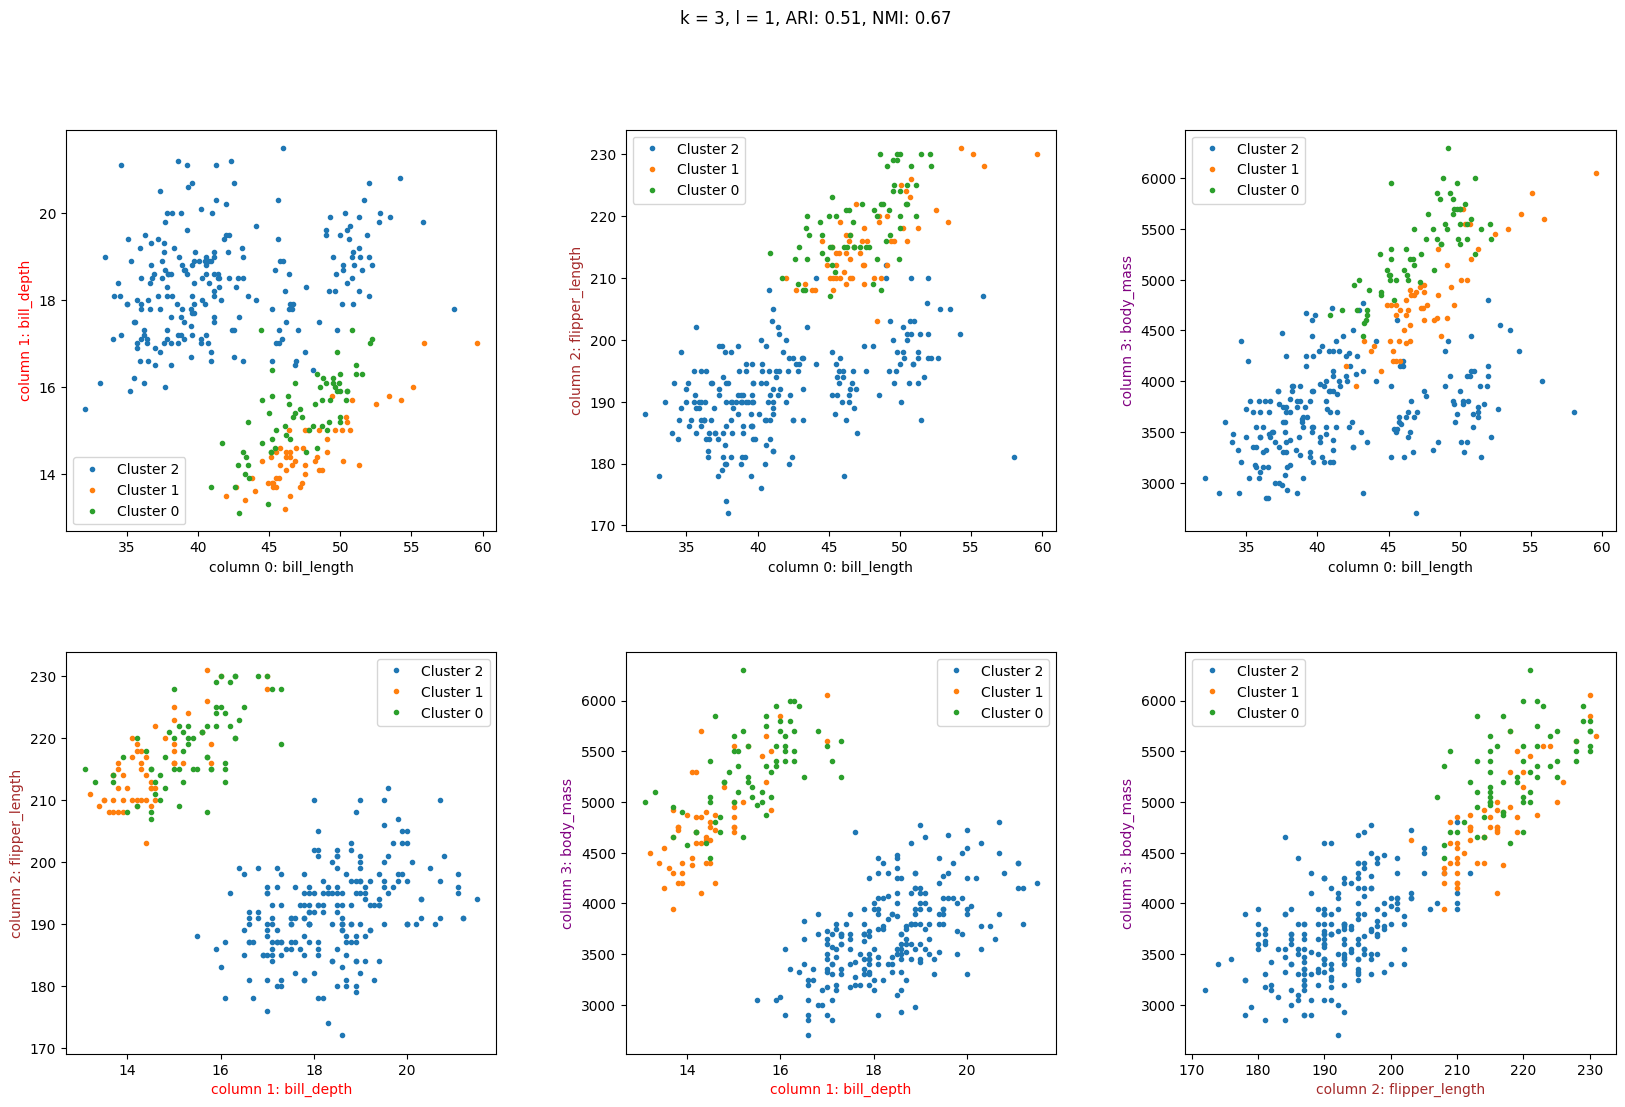

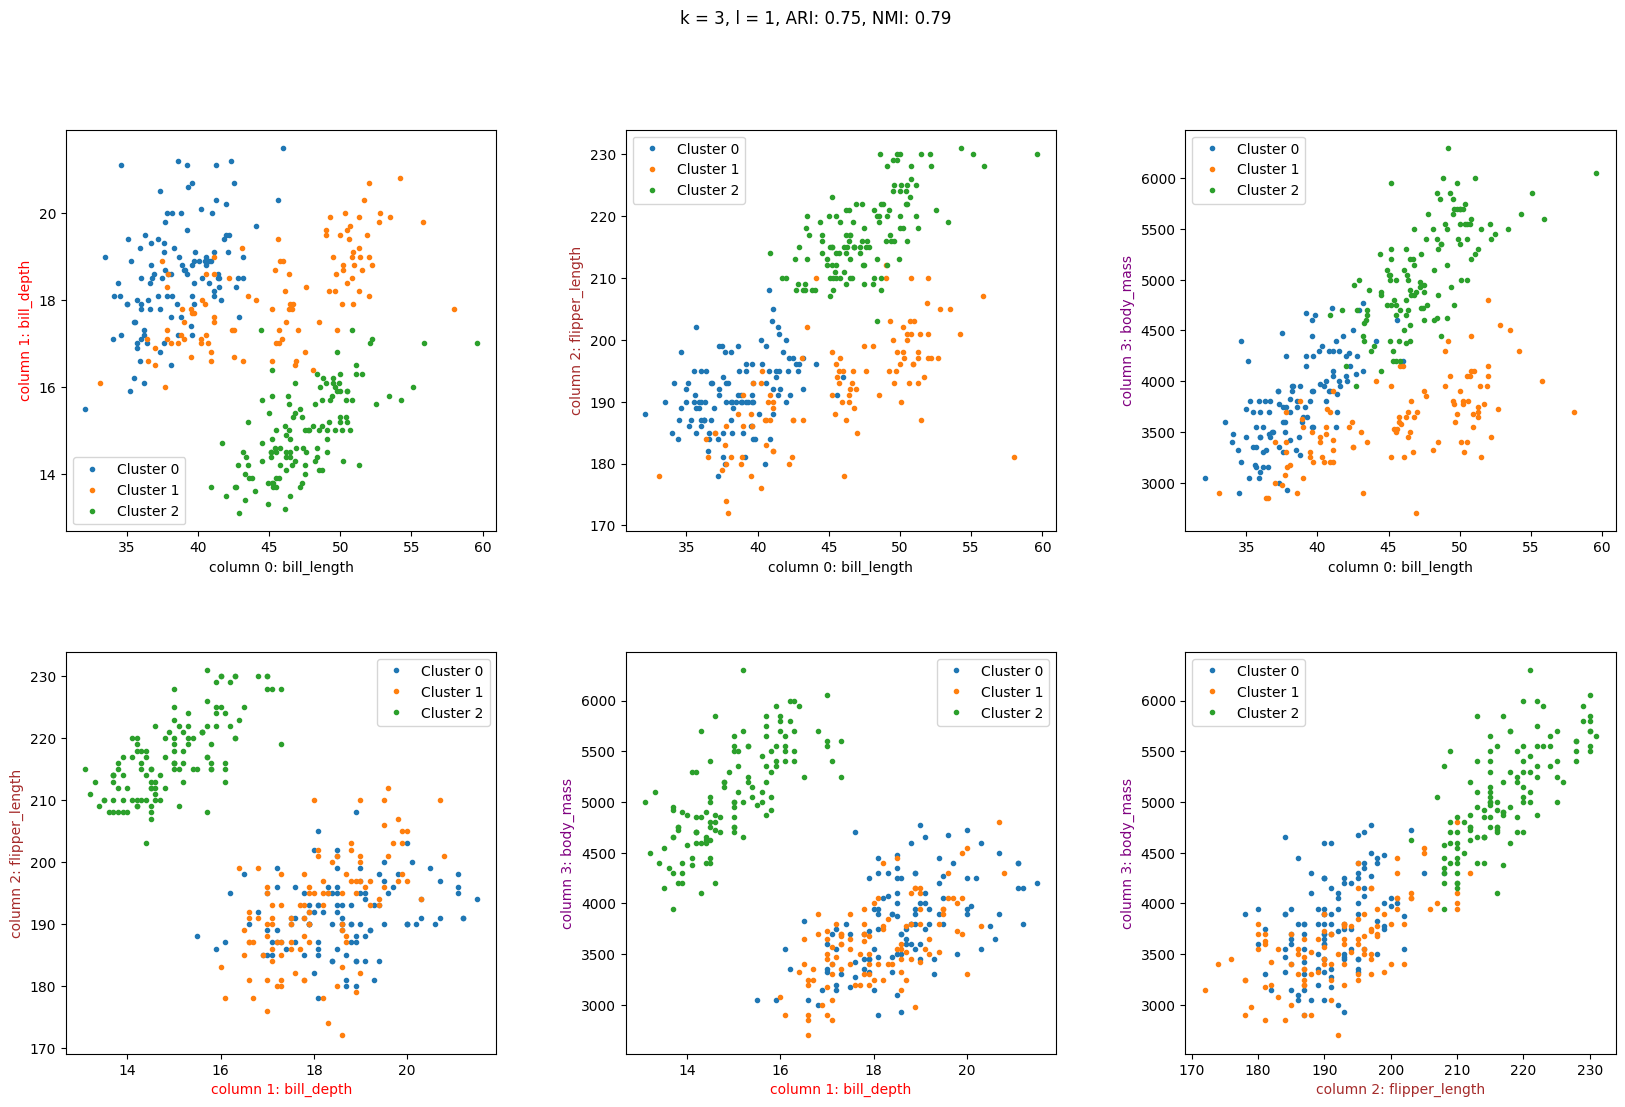

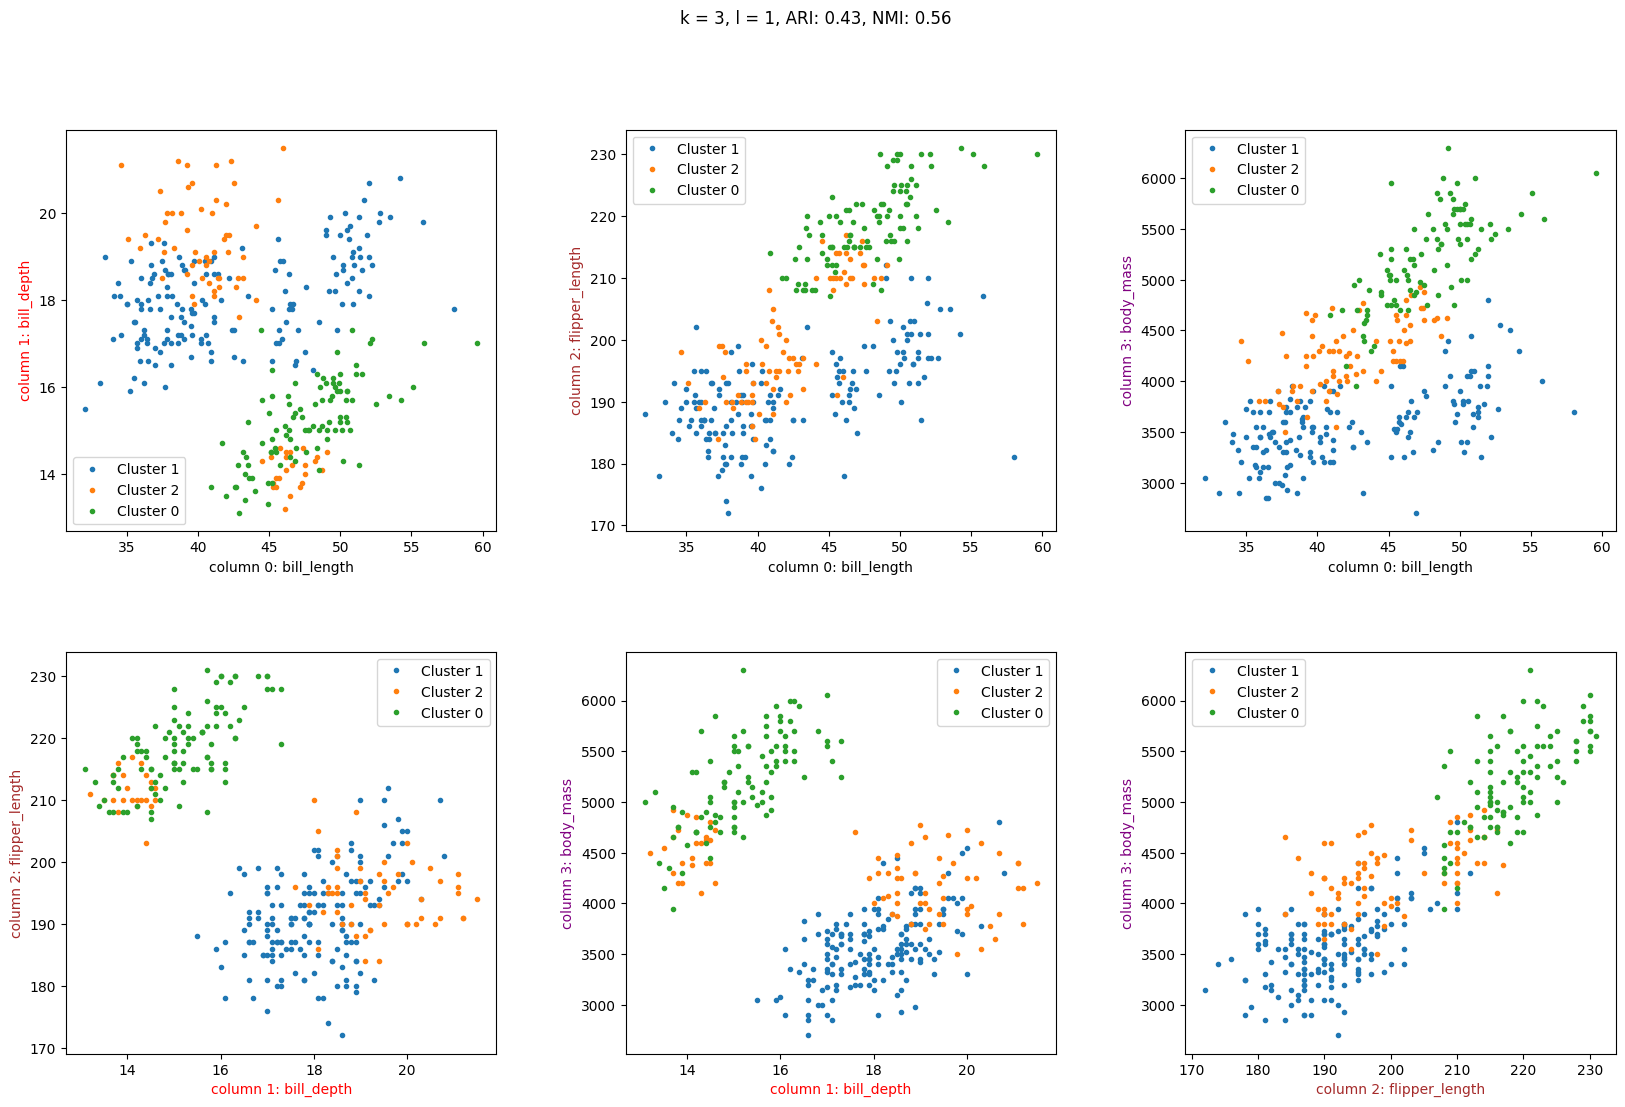

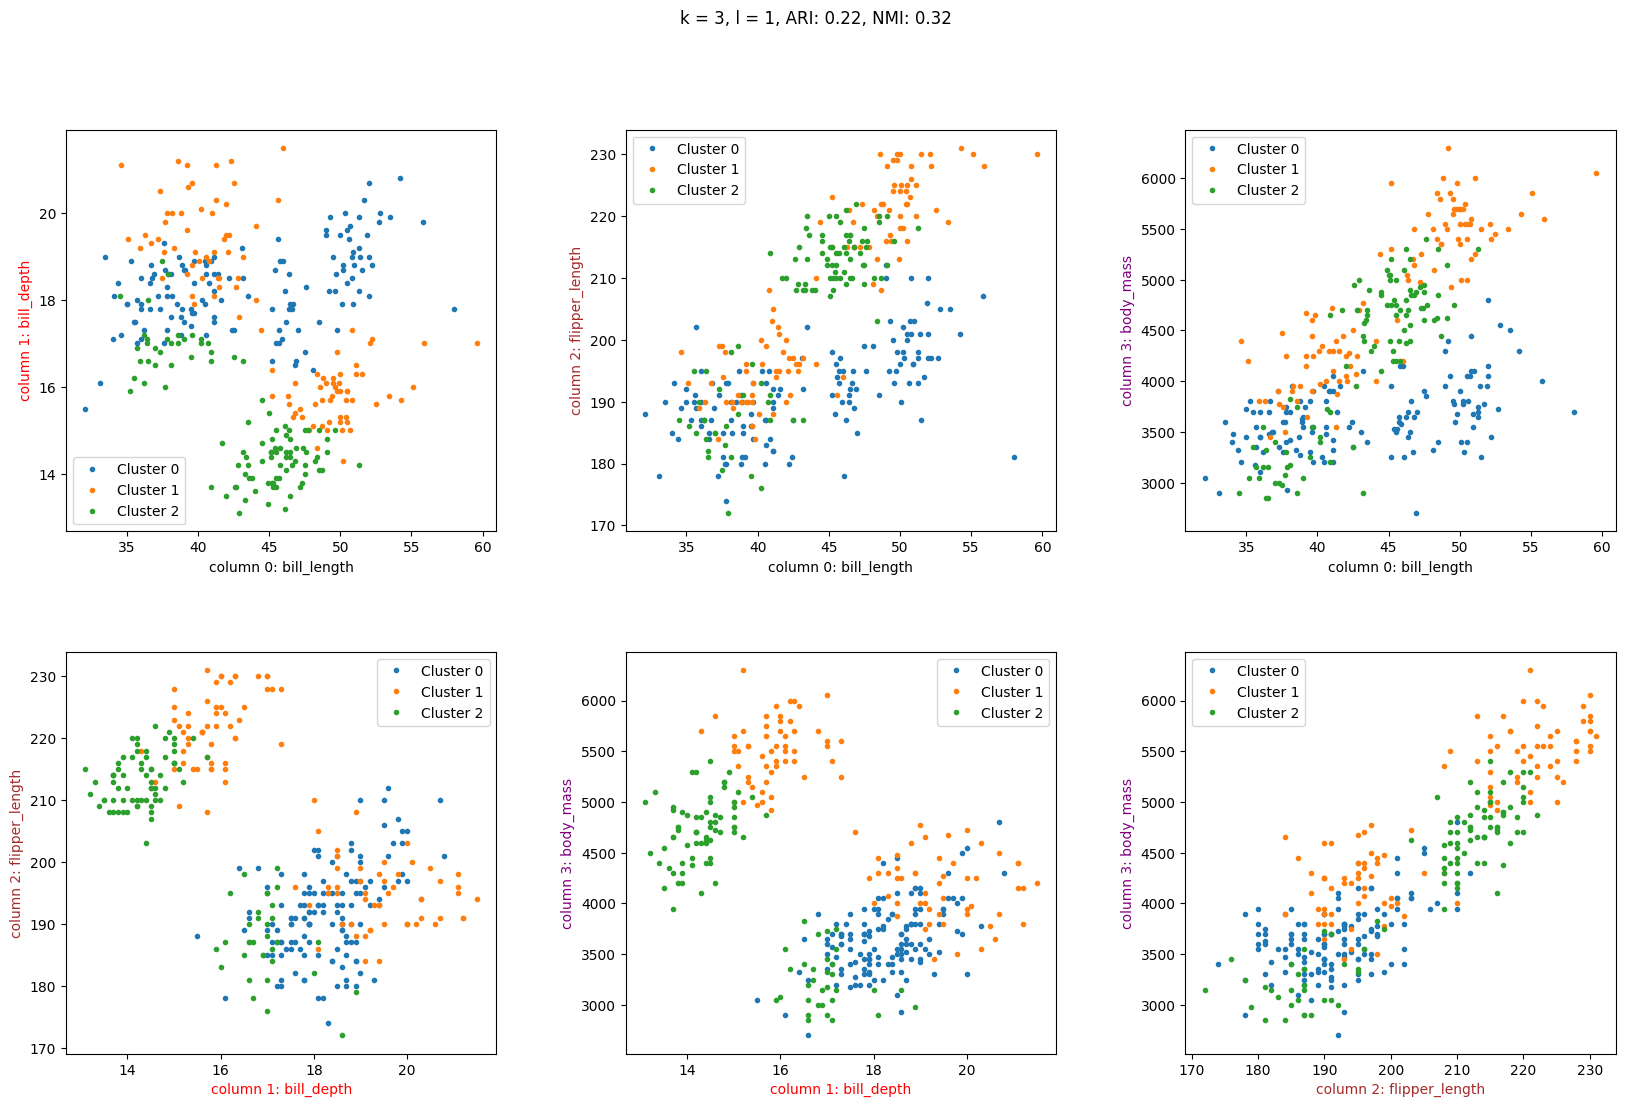

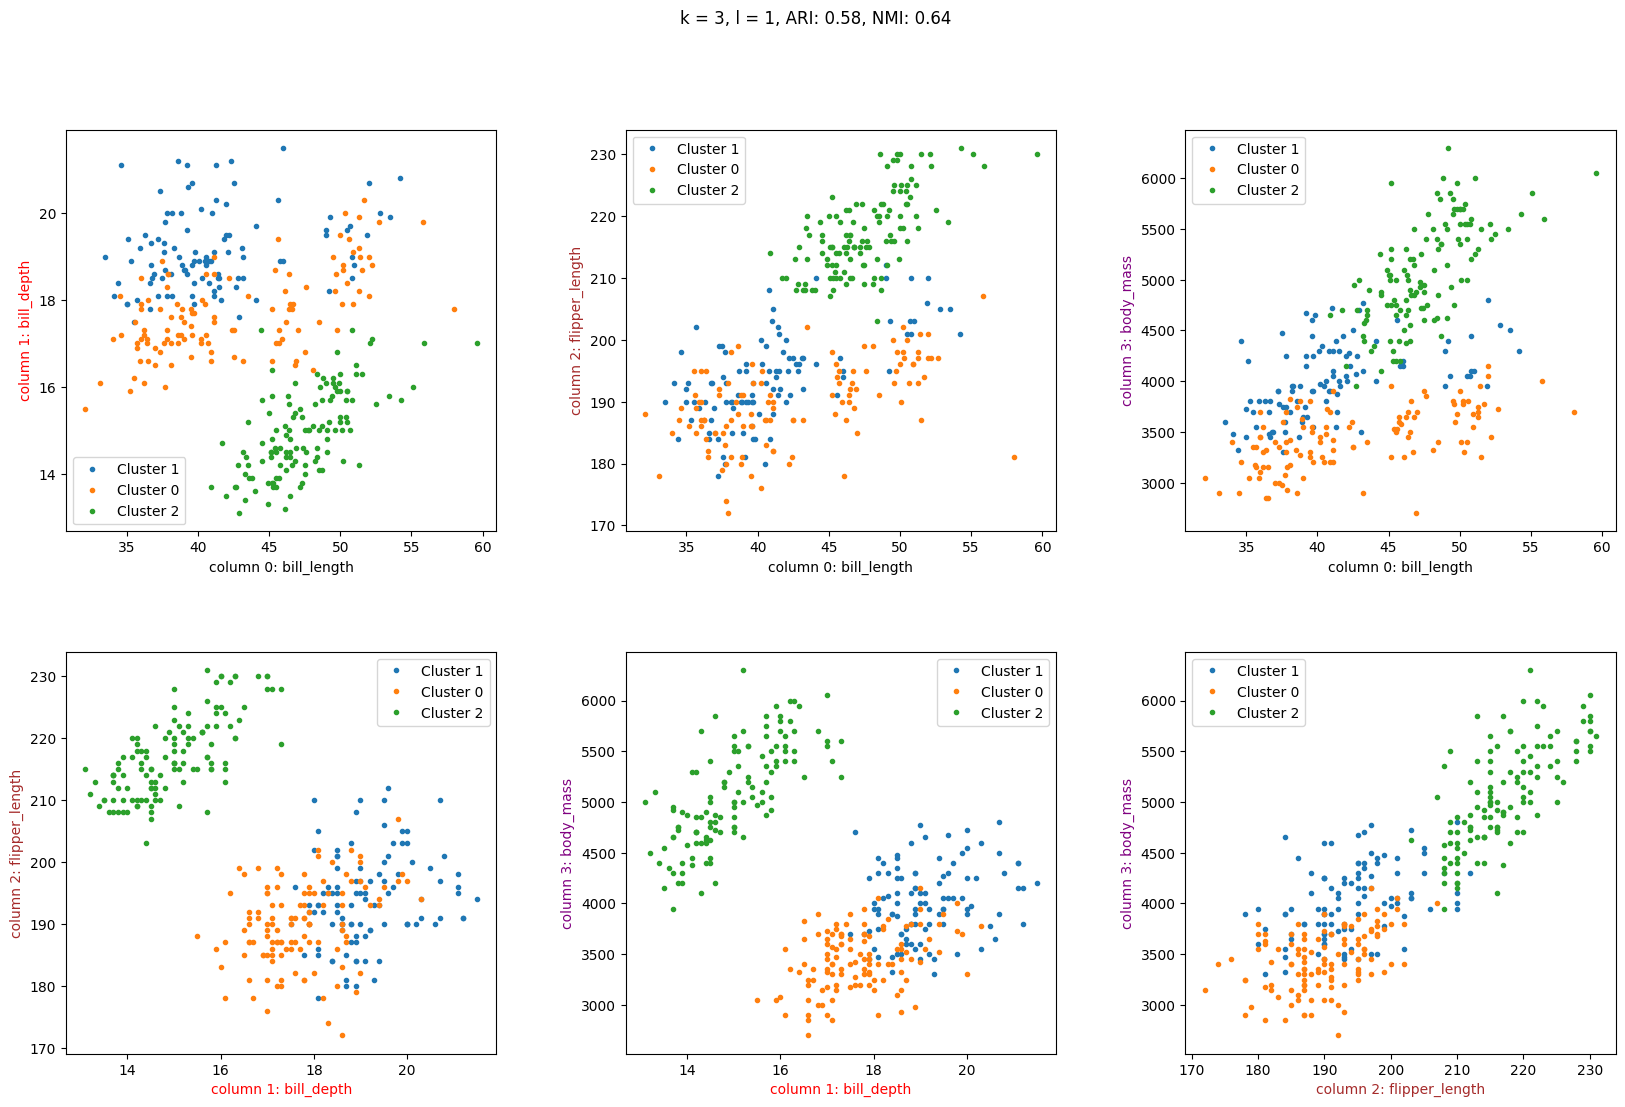

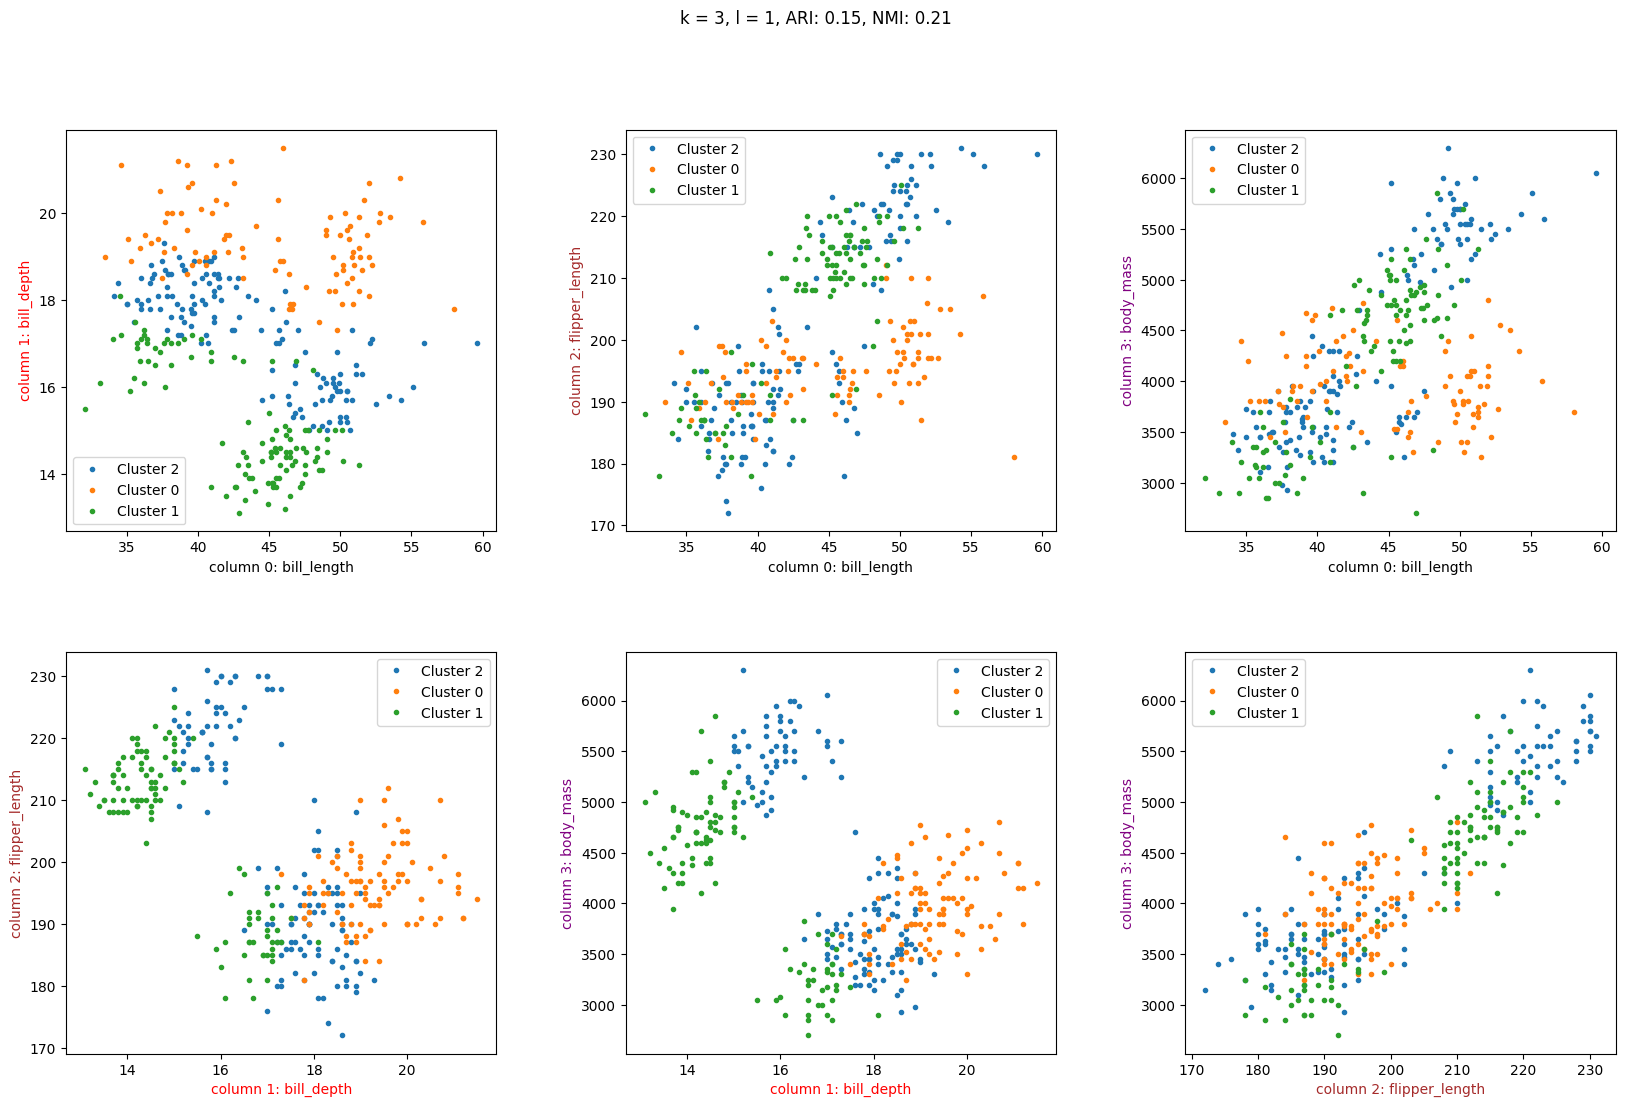

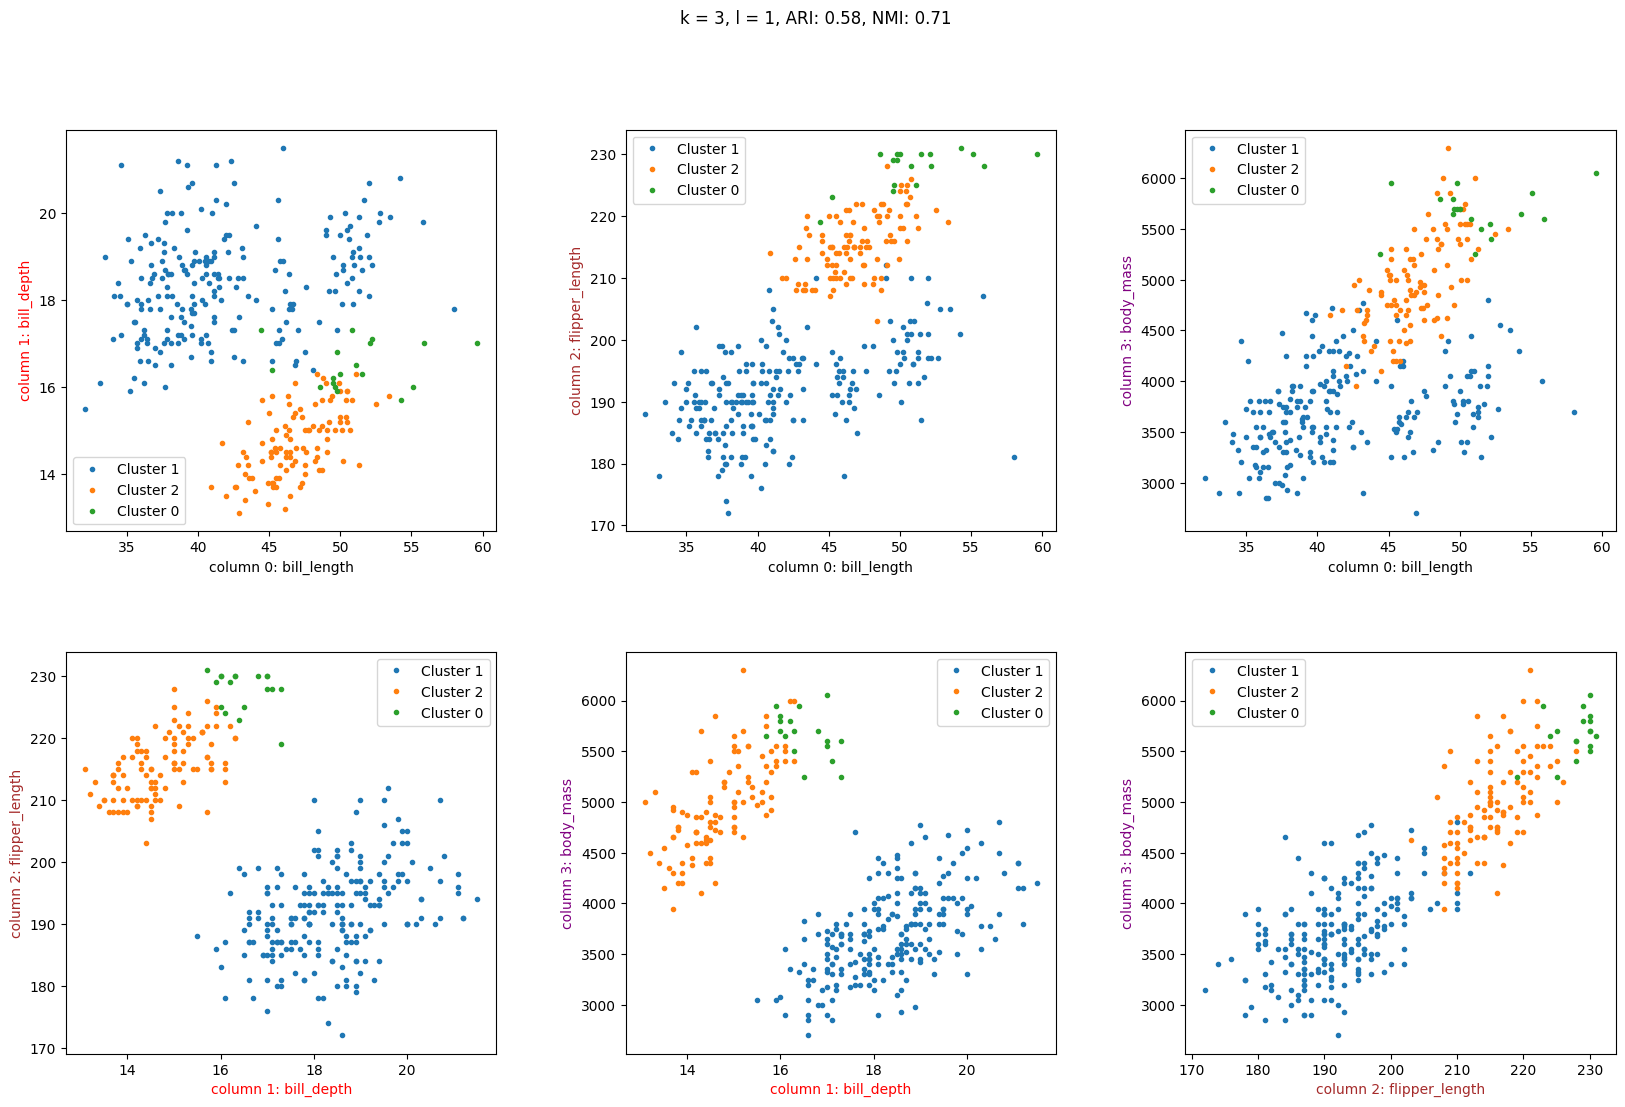

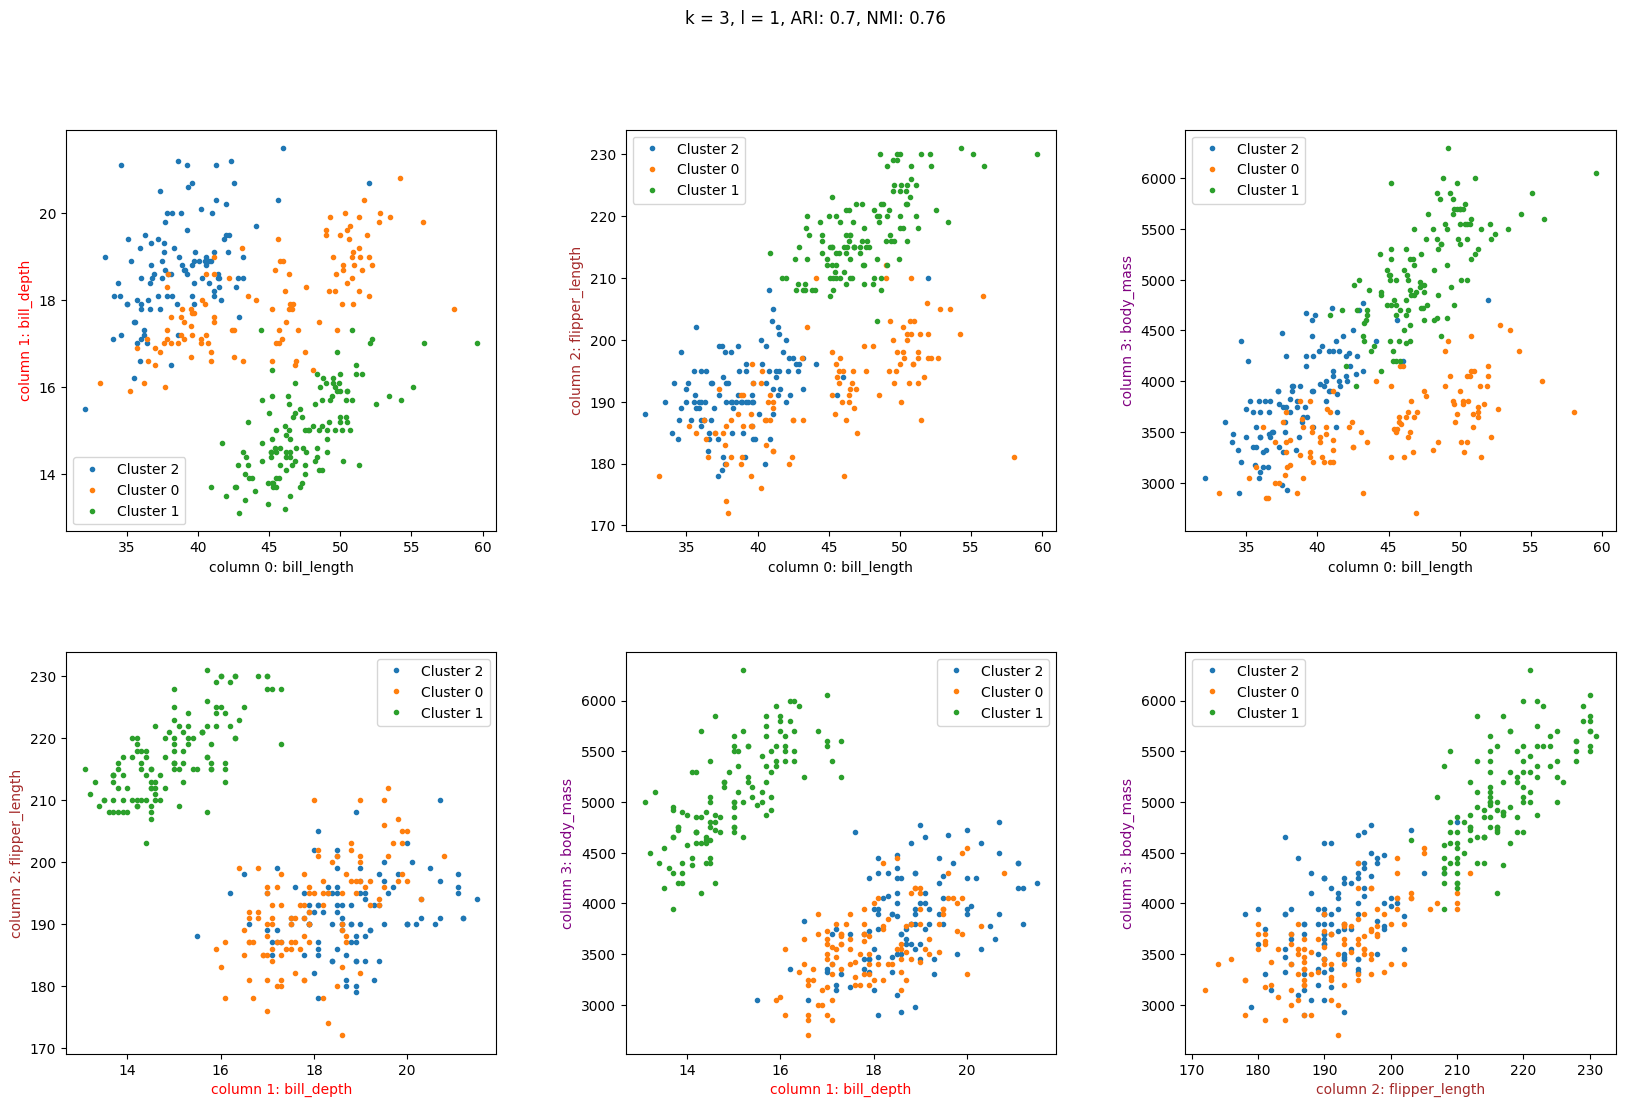

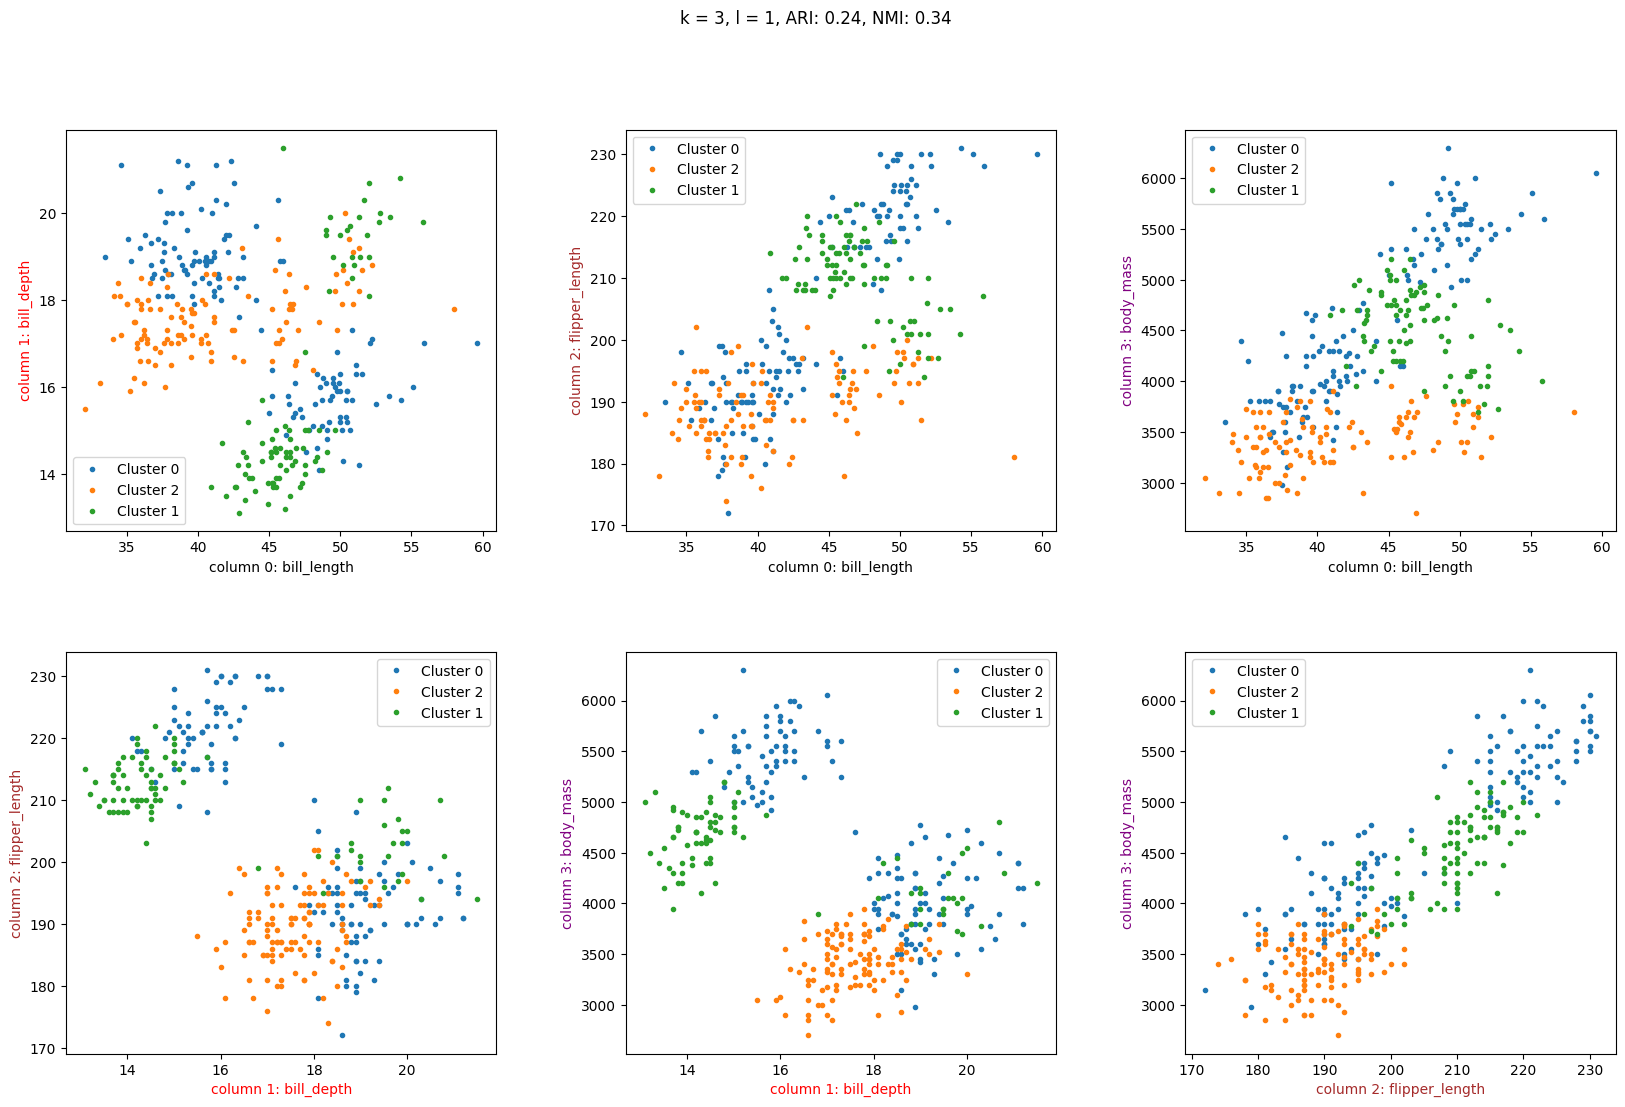

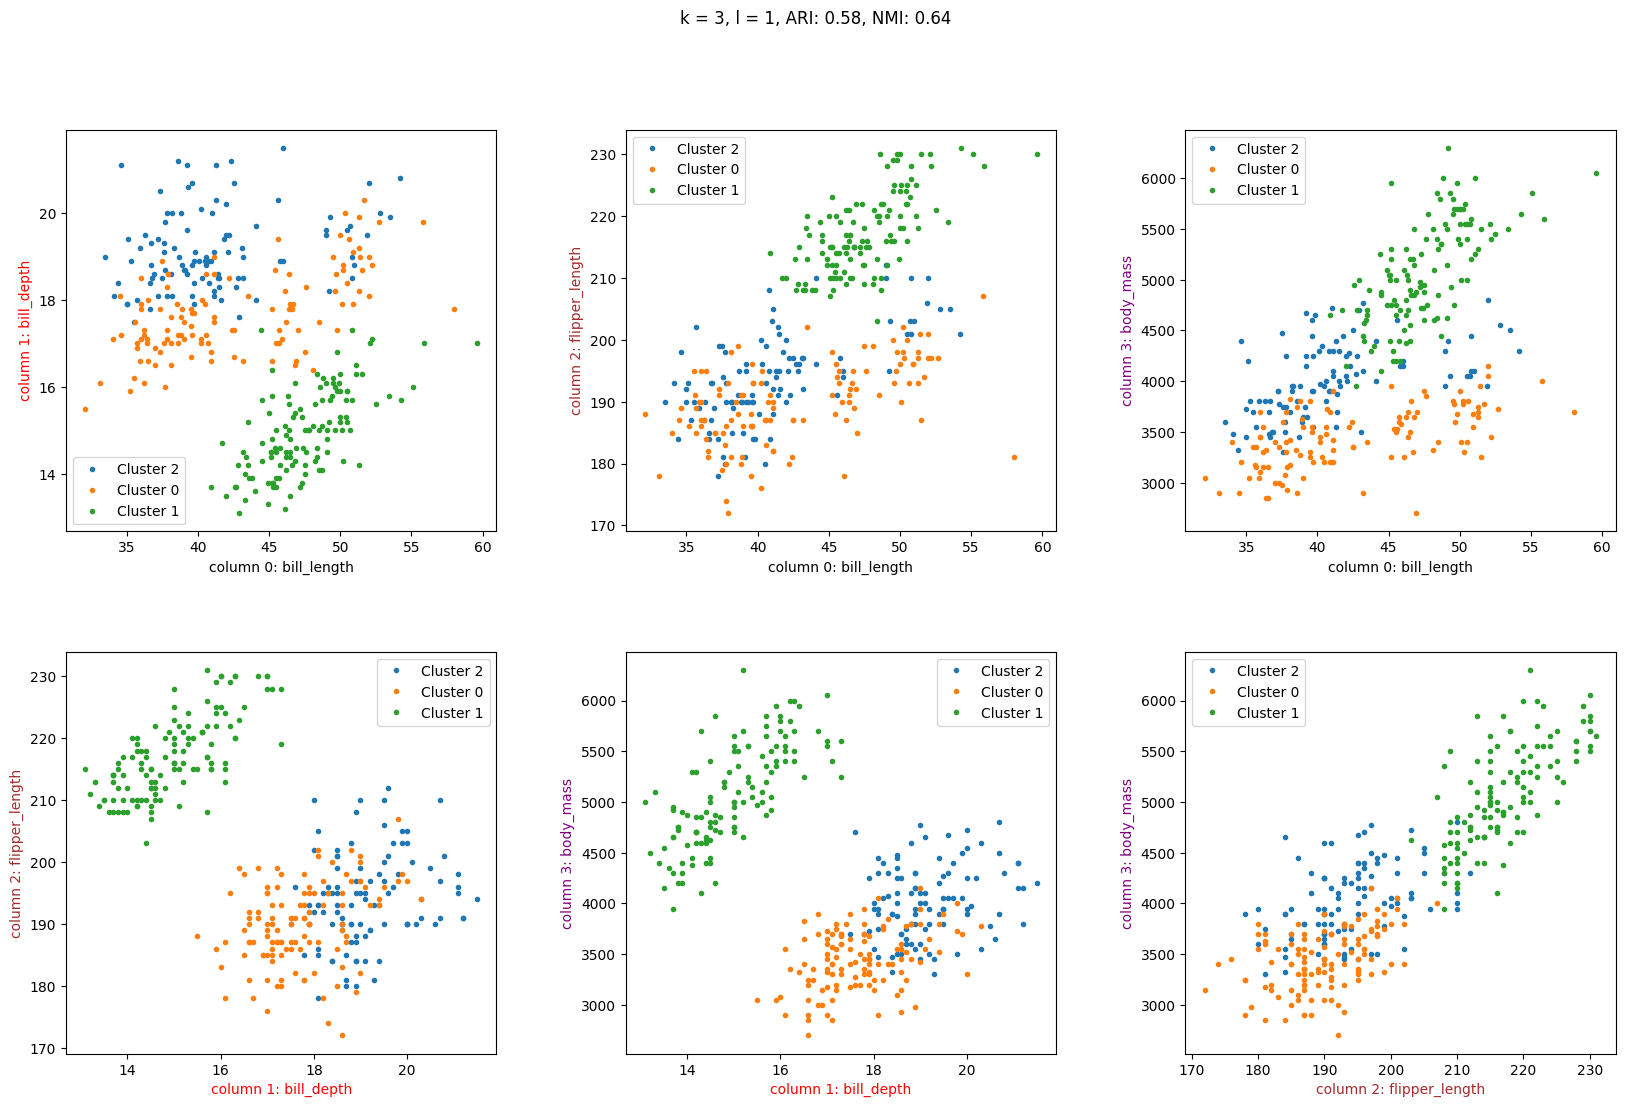

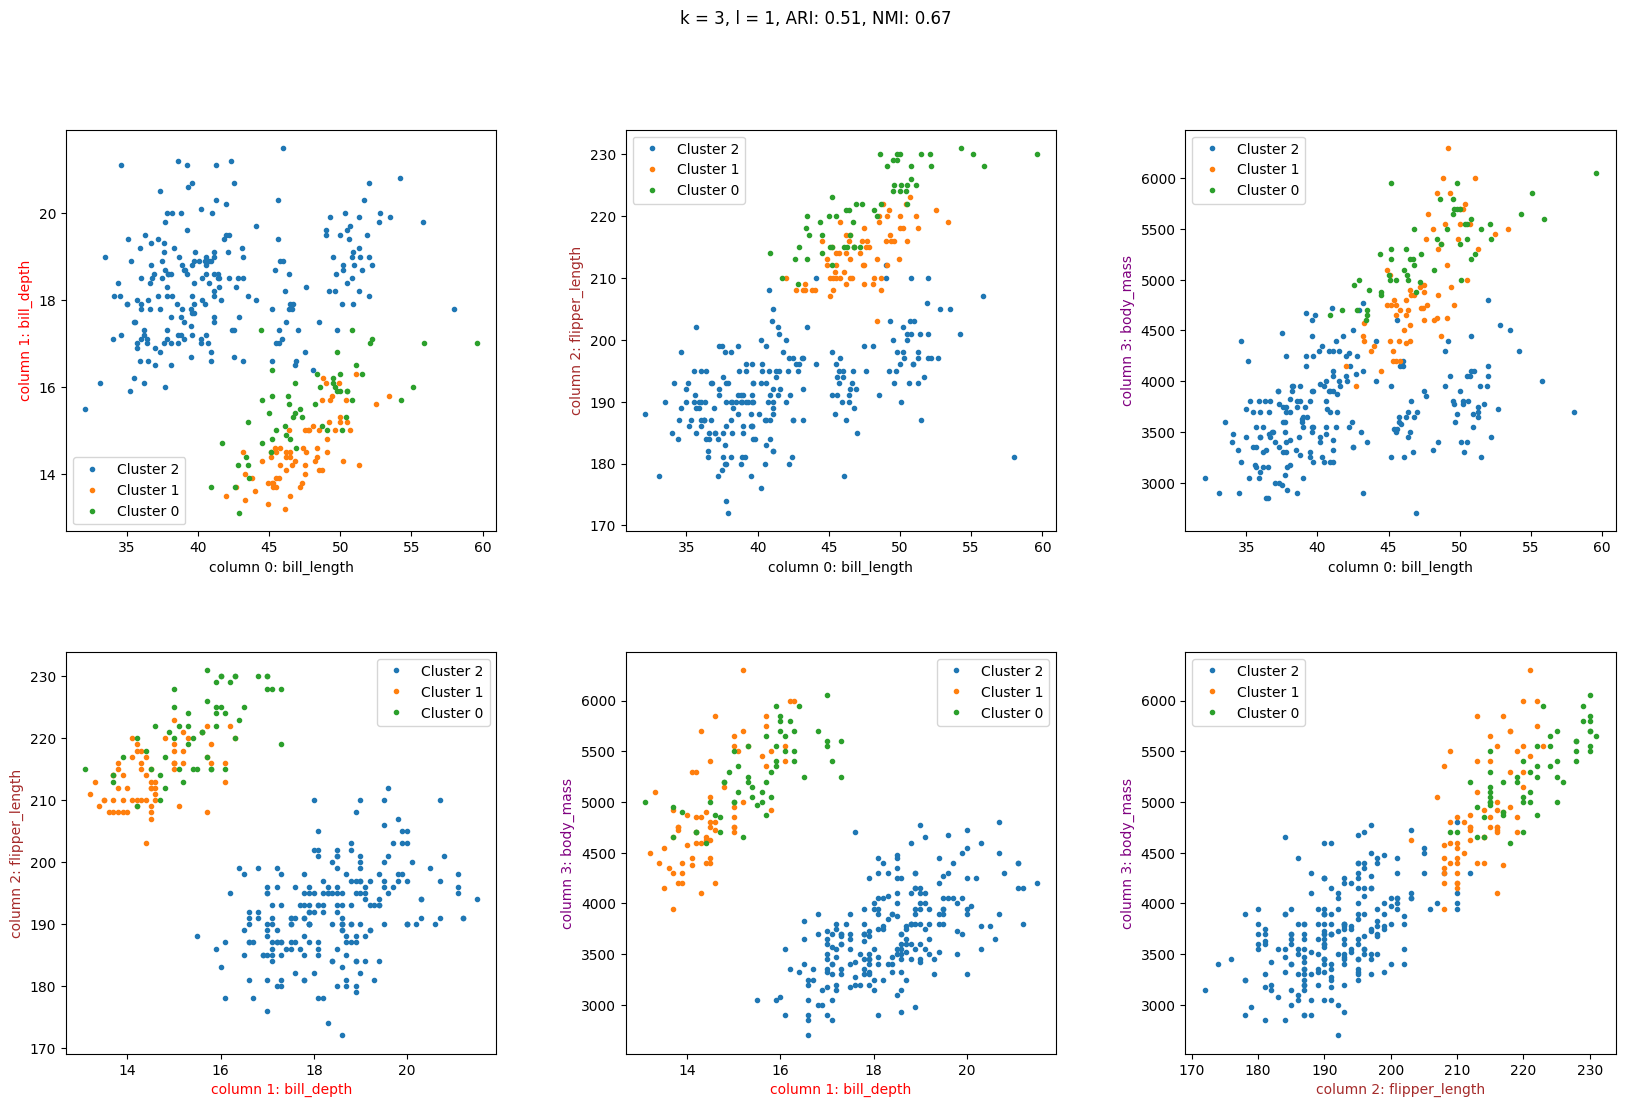

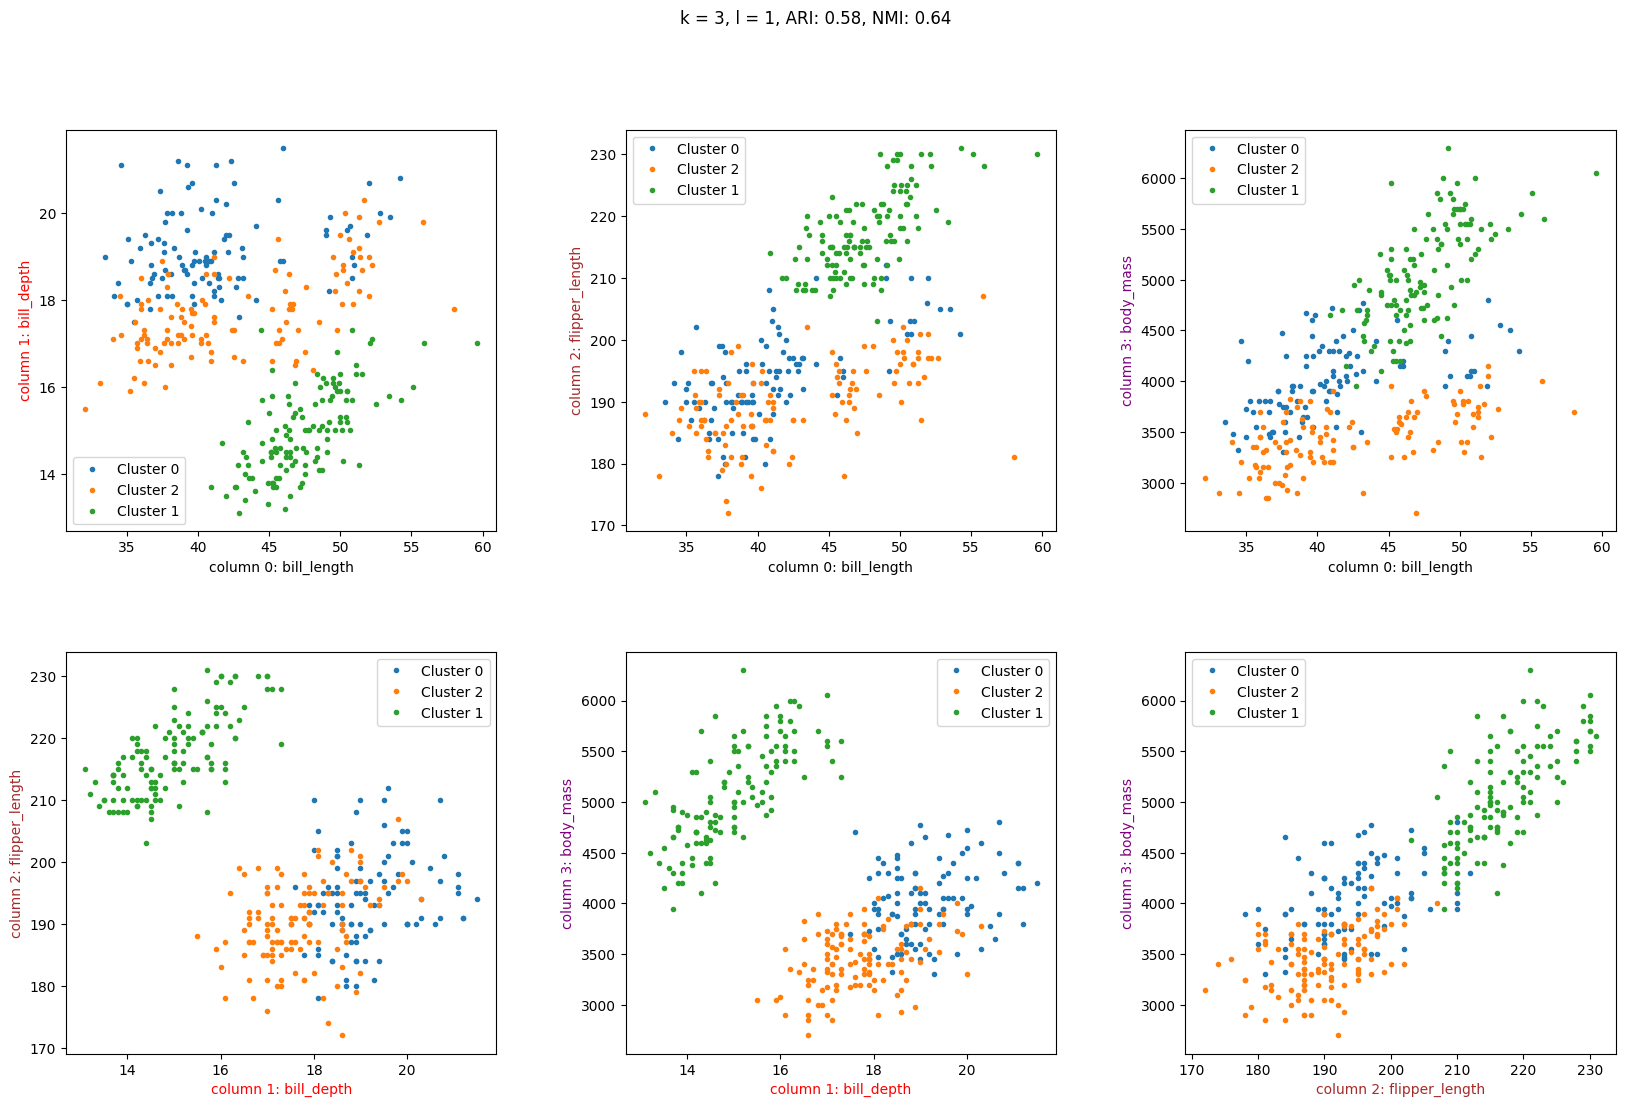

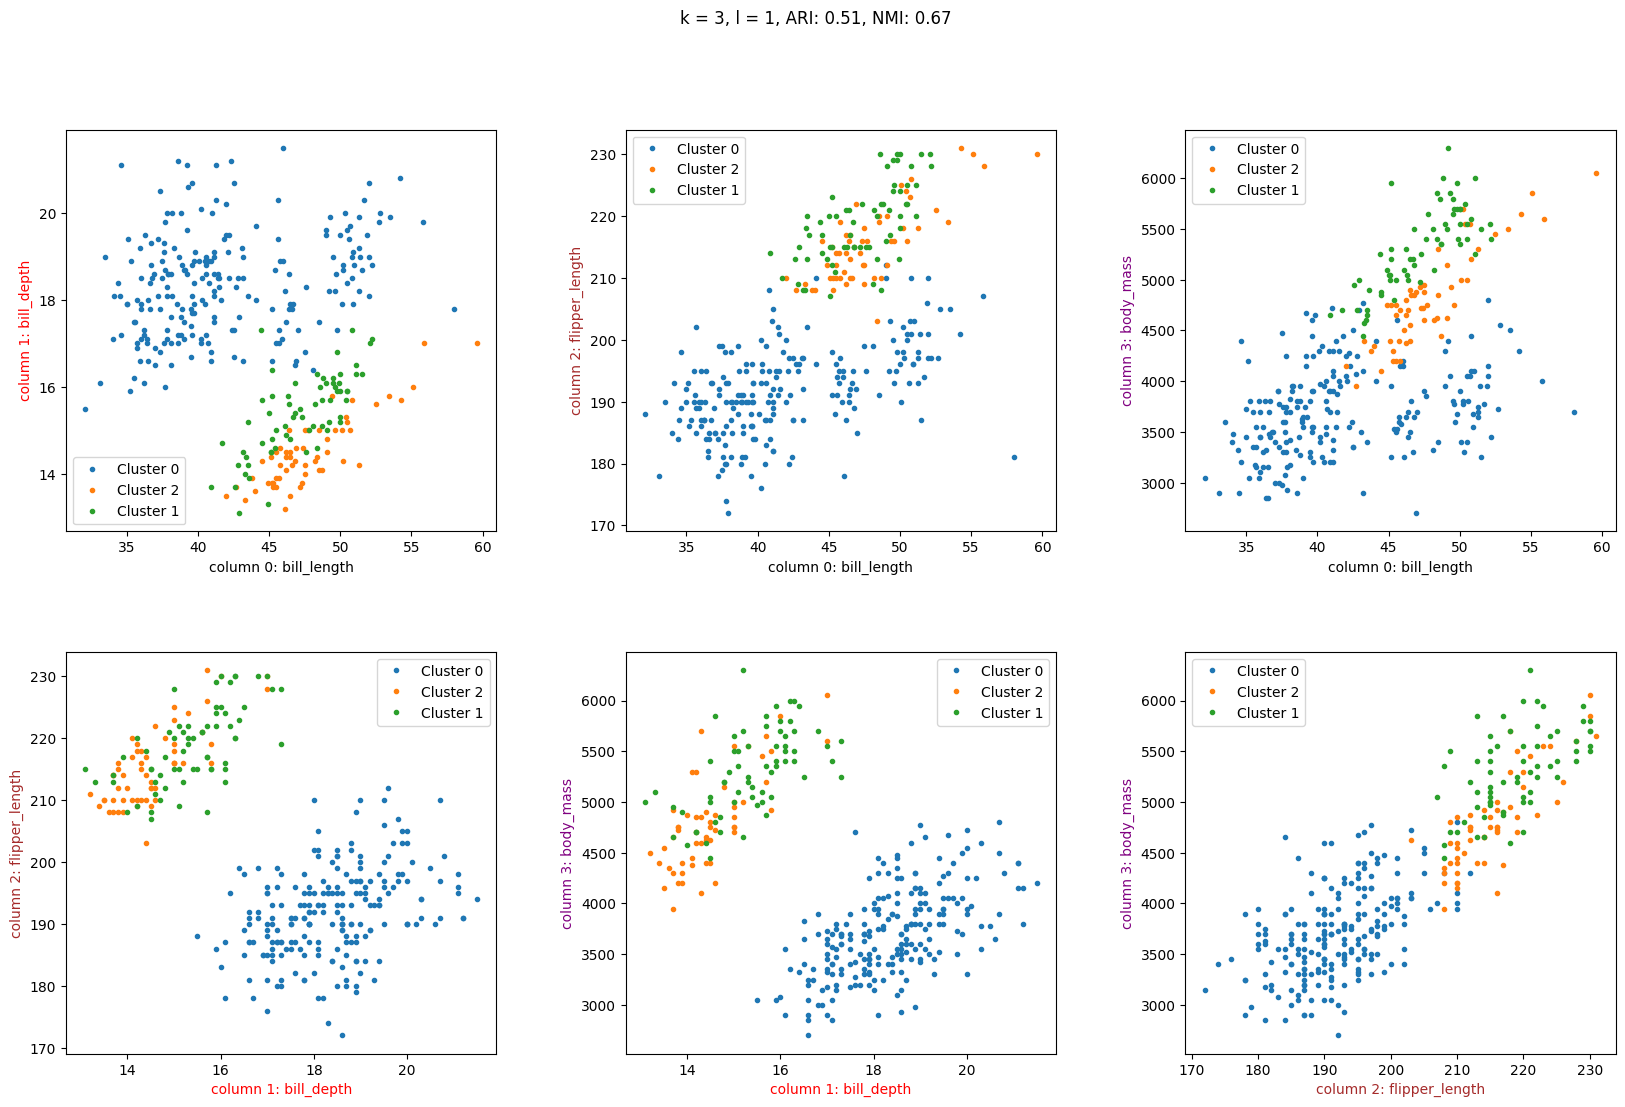

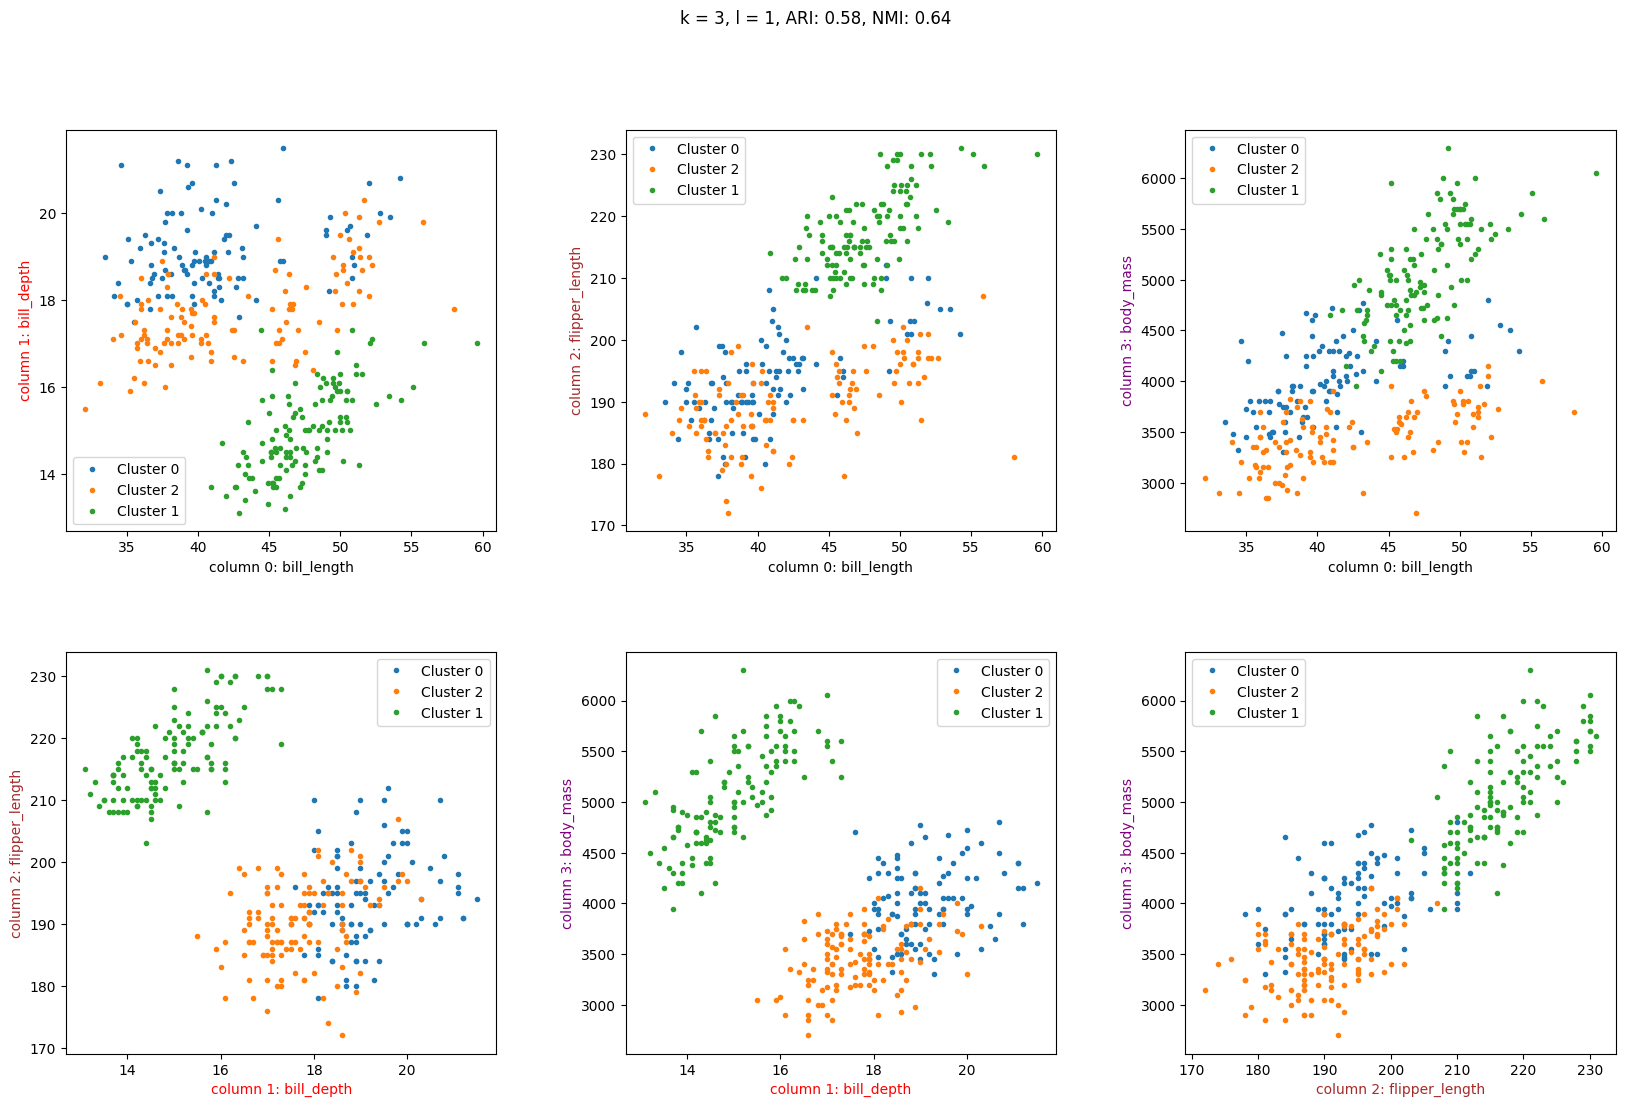

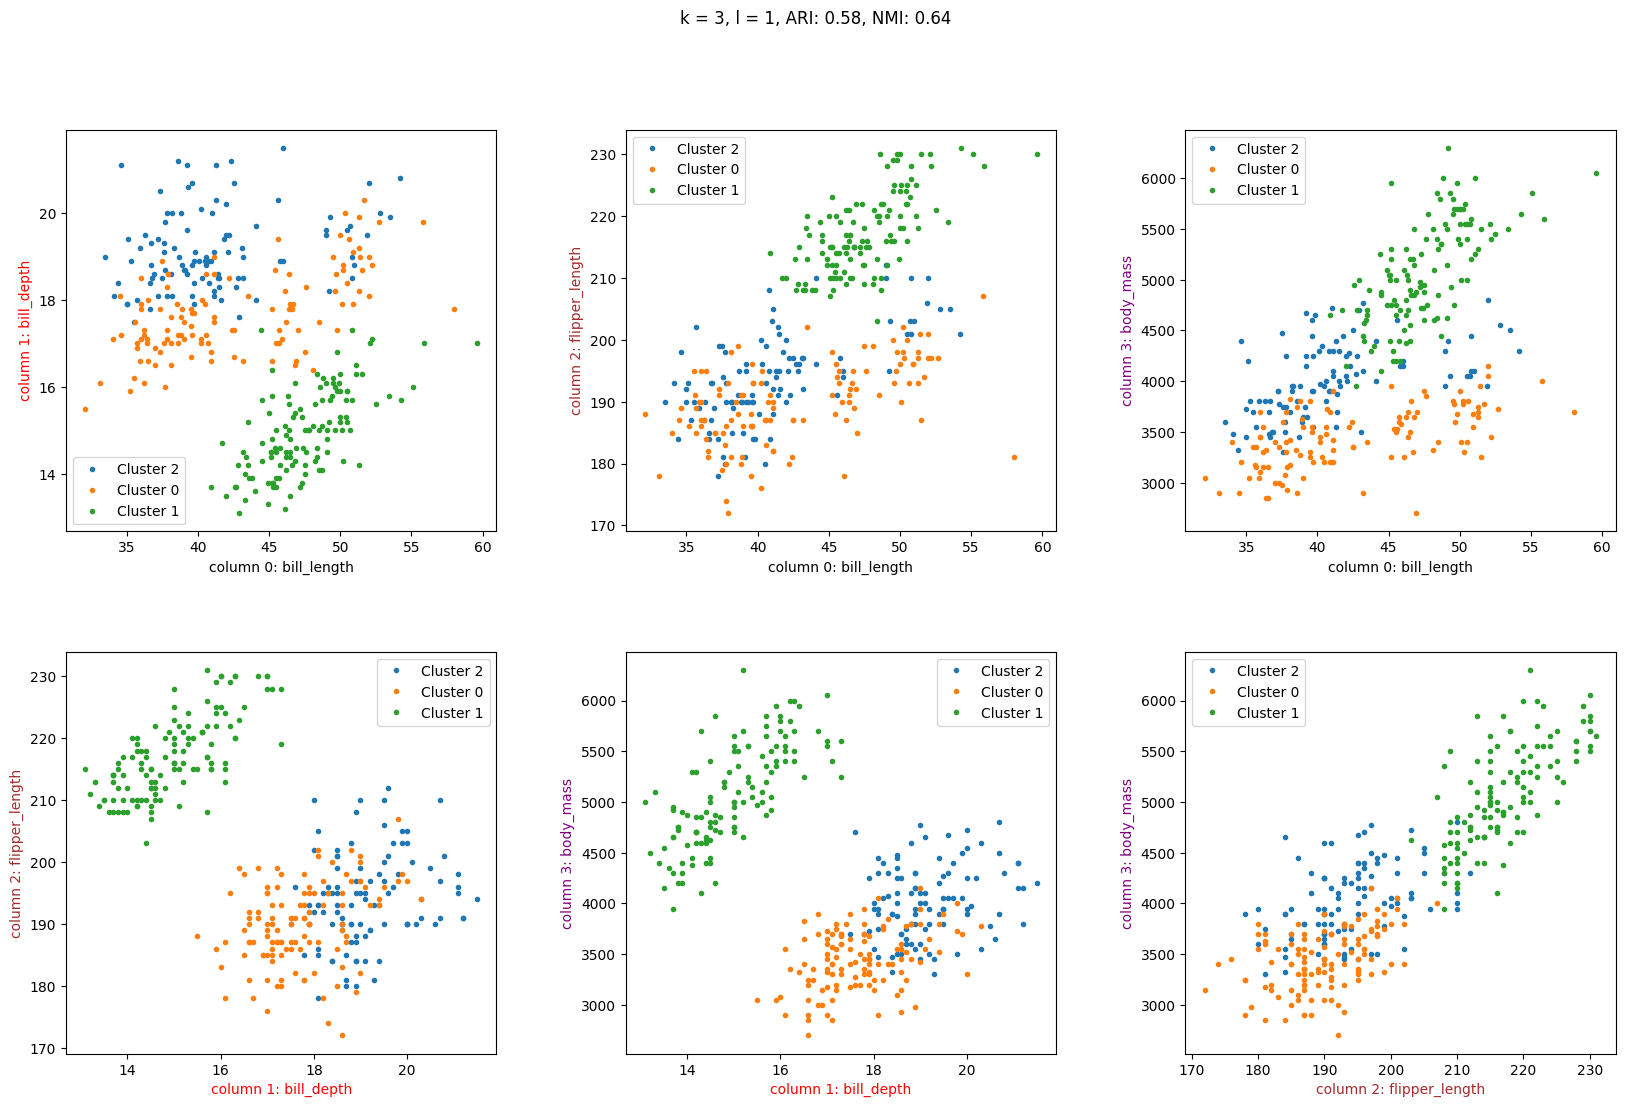

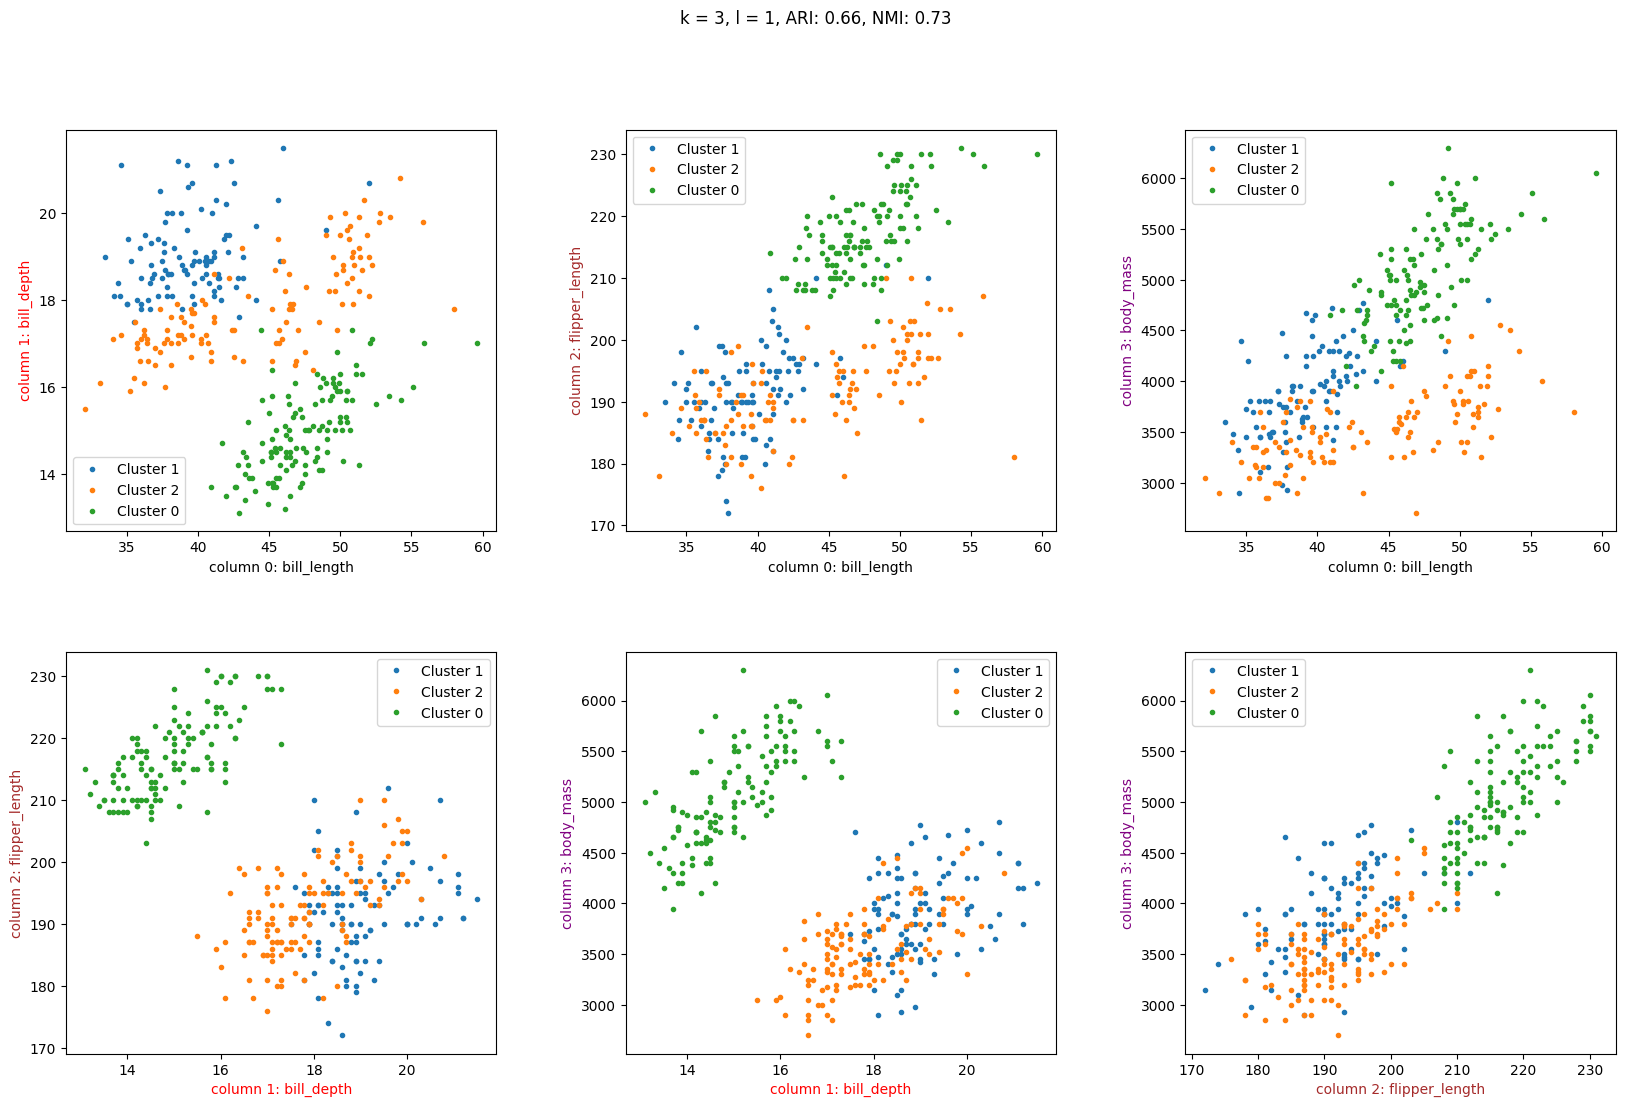

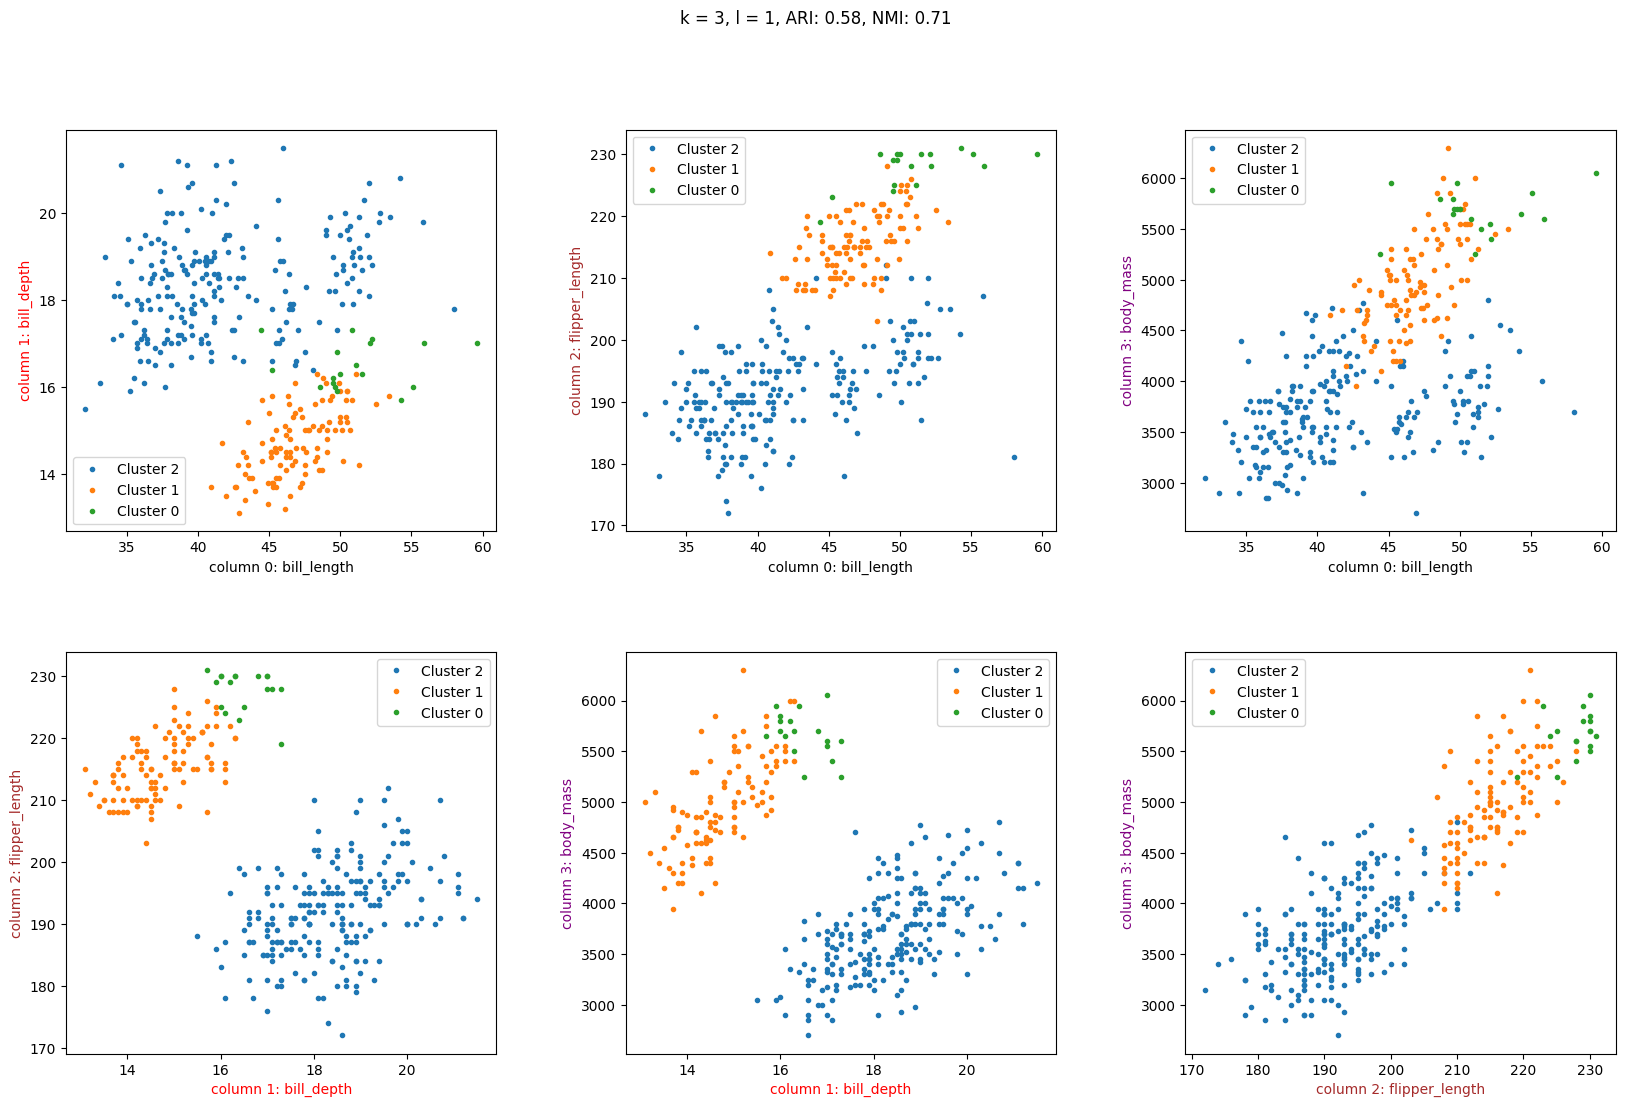

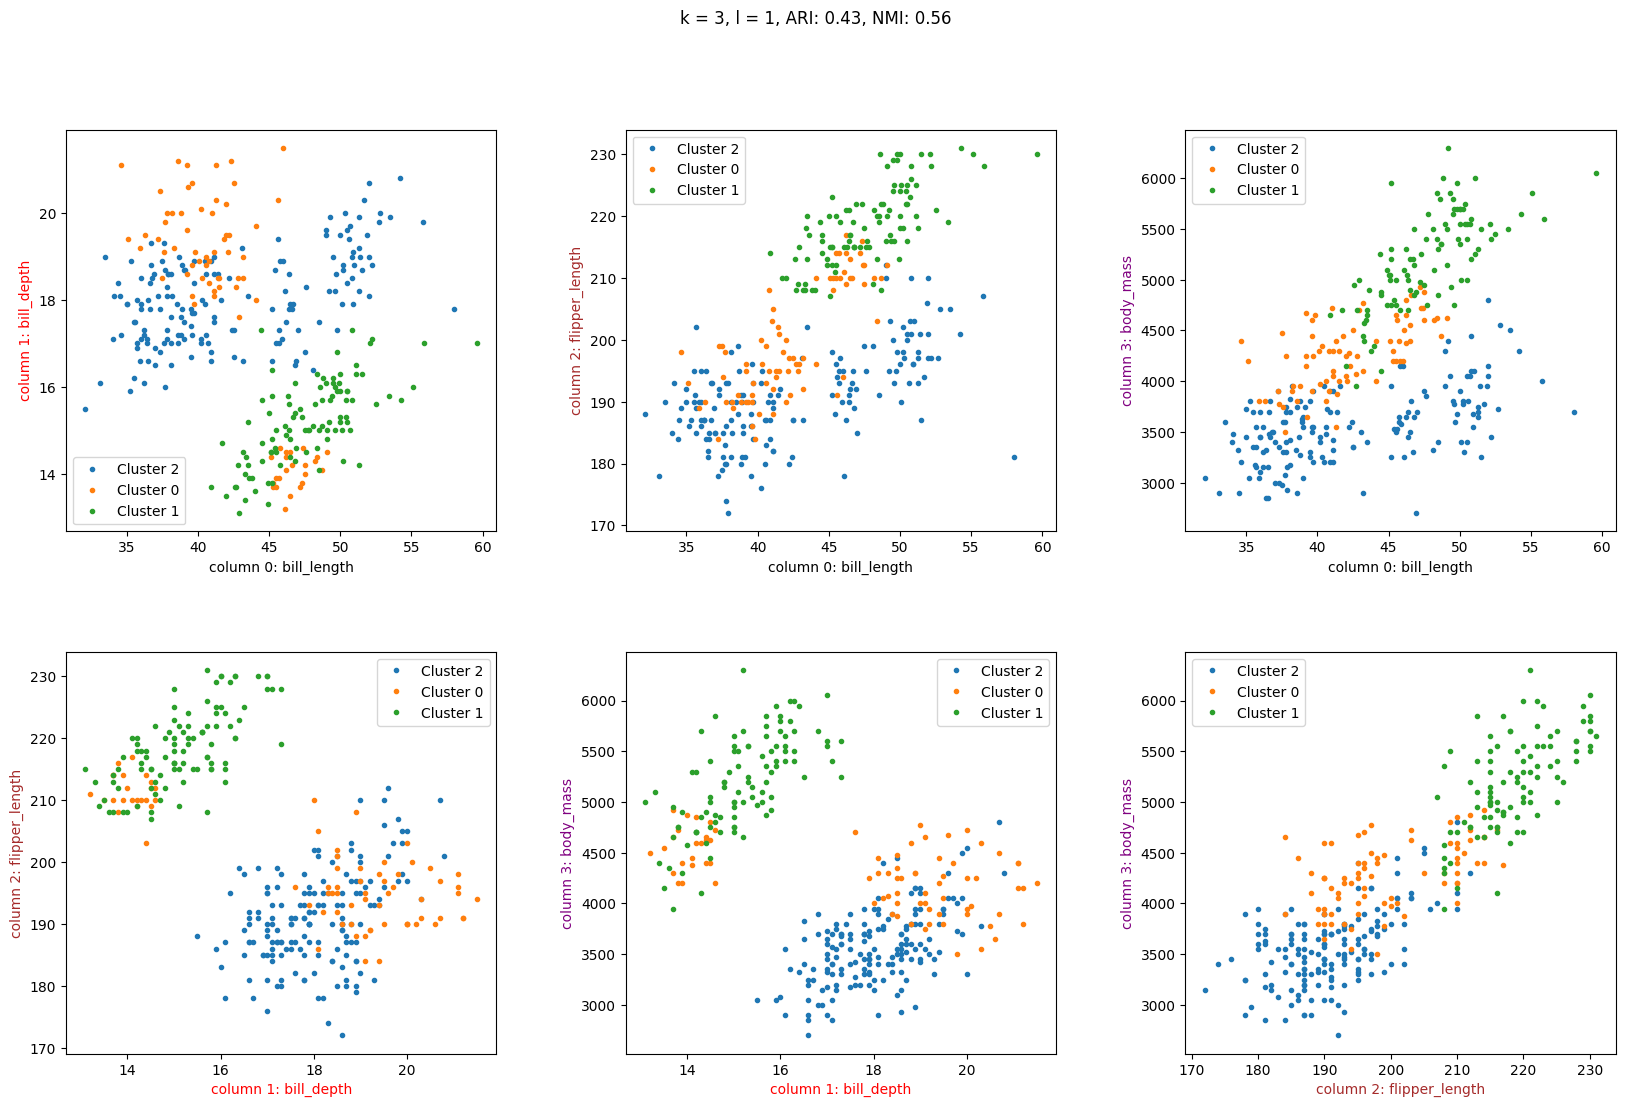

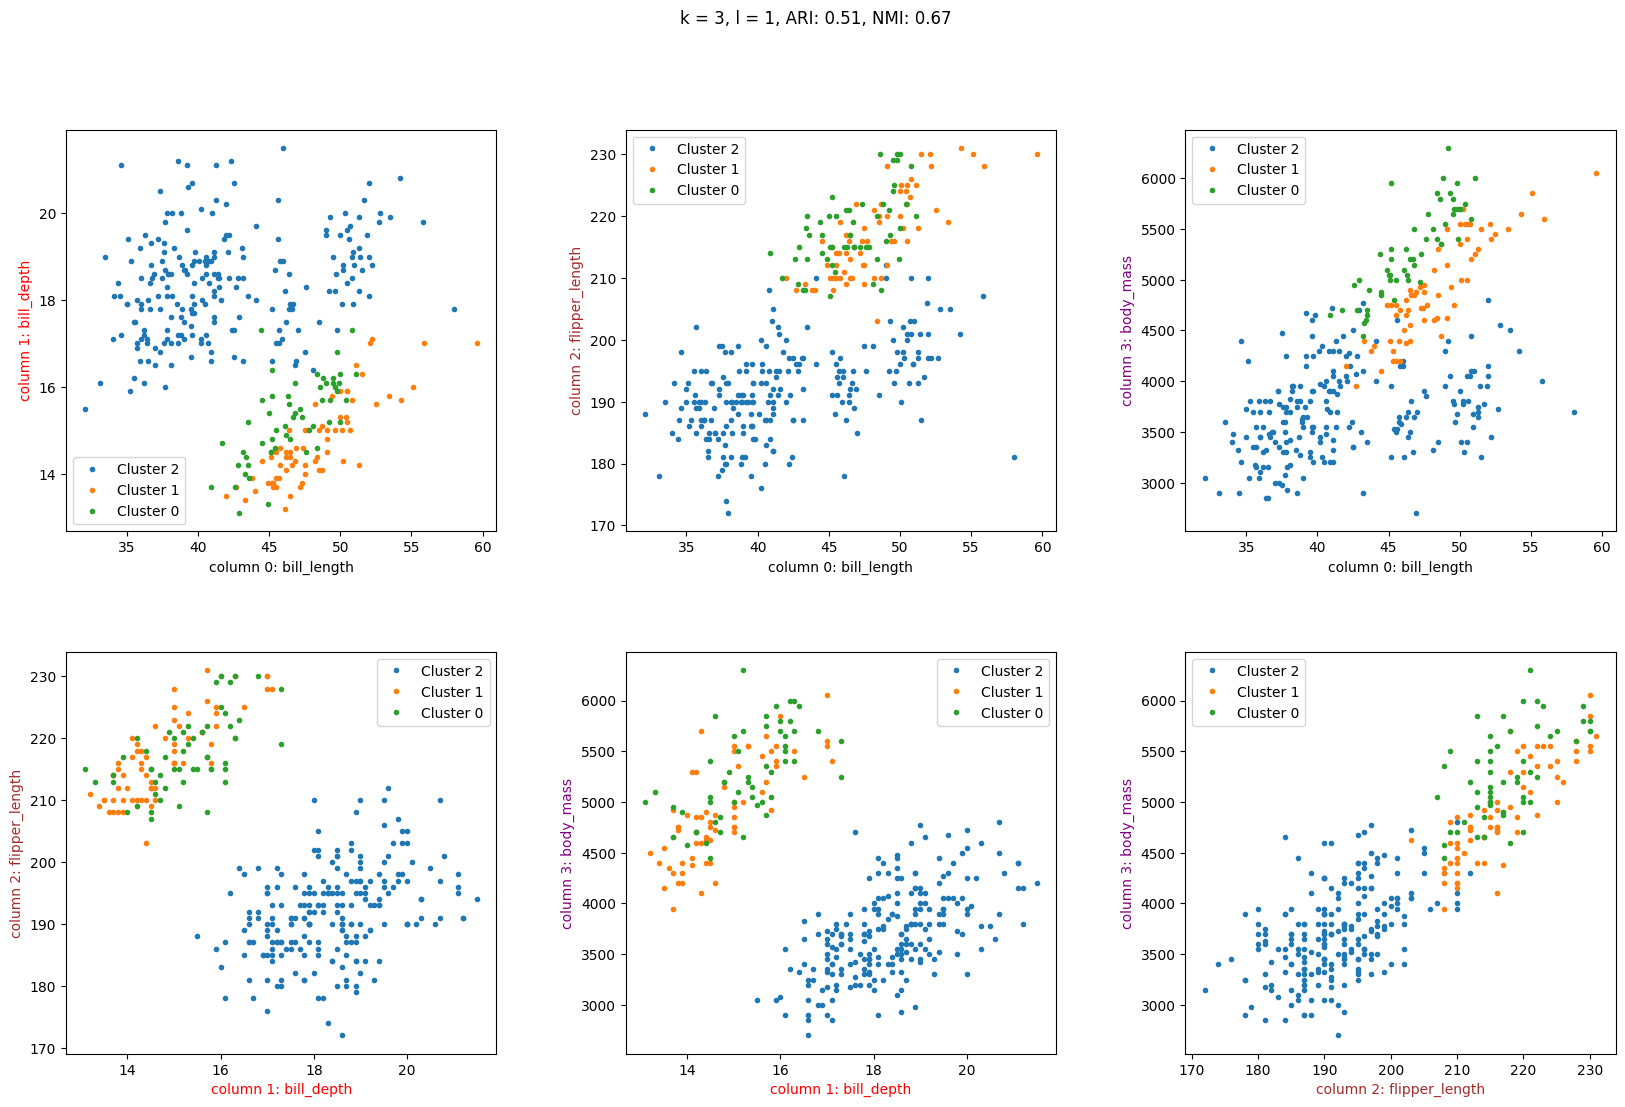

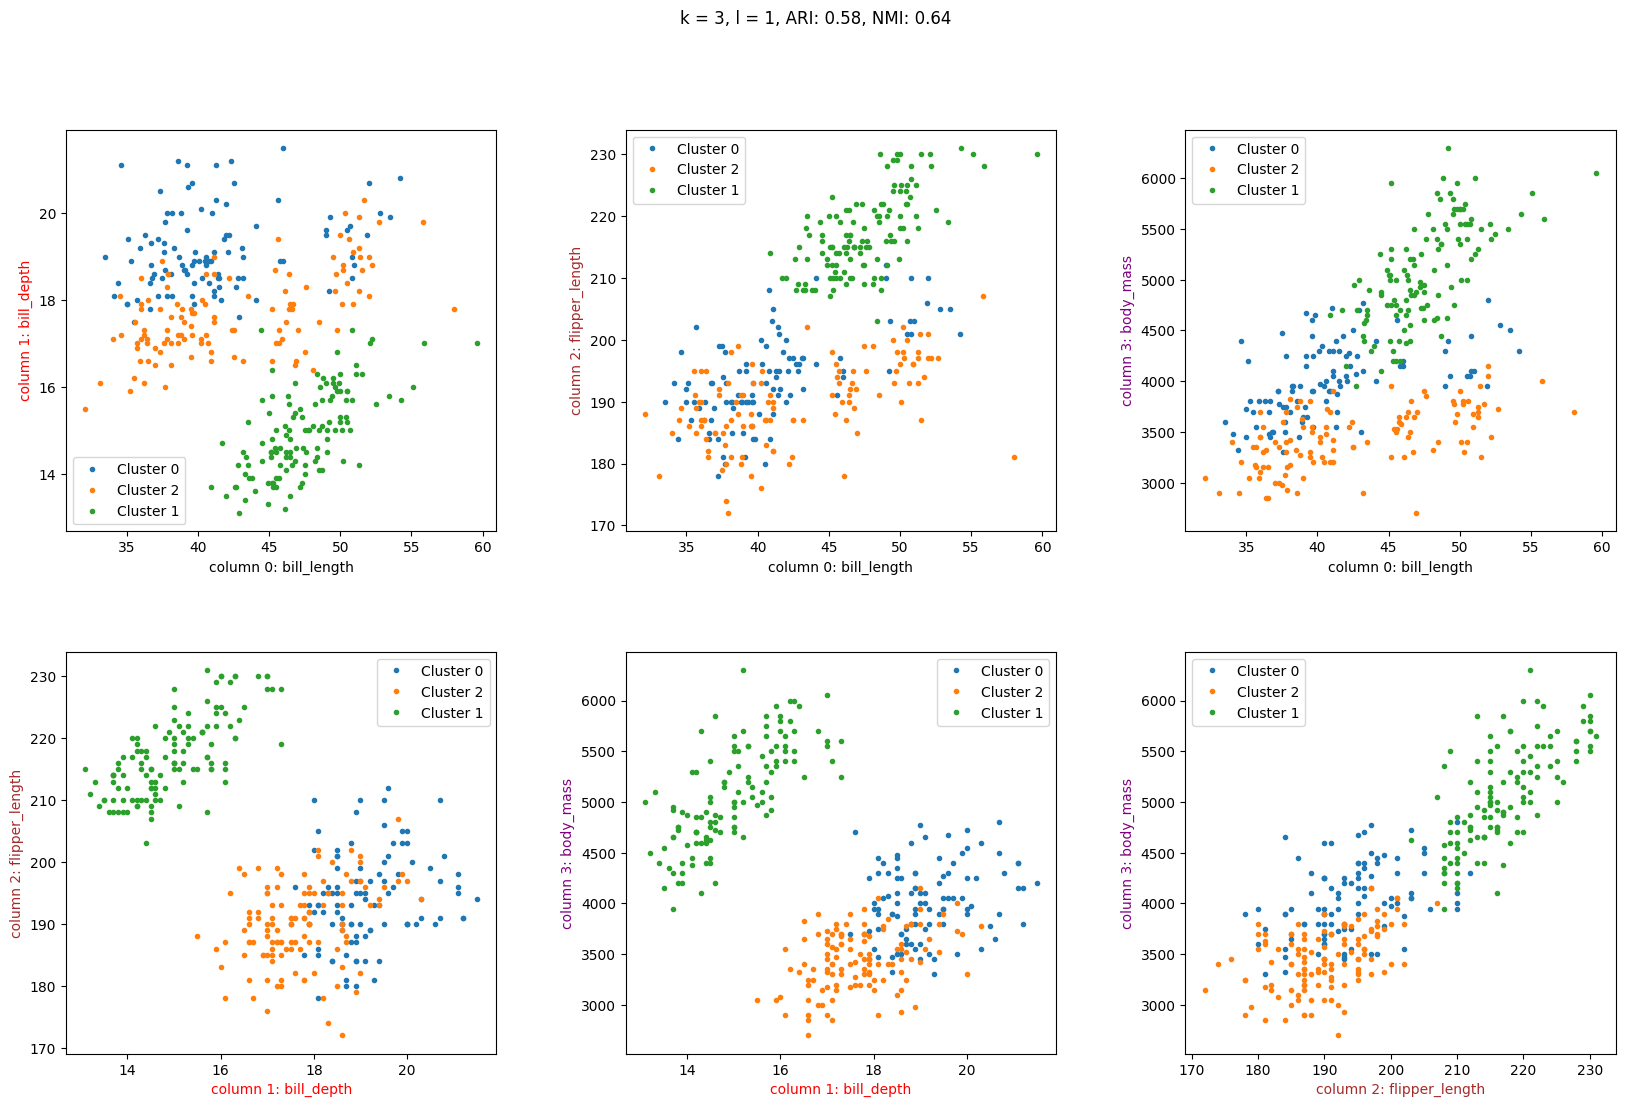

In [ ]:
%cd /content
!mkdir penguins
%cd /content/penguins

create_scores_penguins(data, tr_labels, 3, 1, 20)

In [ ]:
%cd /content
!mkdir penguins
%cd /content/penguins

create_scores_penguins(data, tr_labels, 3, 2, 20)

In [ ]:
%cd /content
!mkdir penguins
%cd /content/penguins

create_scores_penguins(data, tr_labels, 3, 3, 10)

In [ ]:
!rm -r /content/relevant


In [ ]:
#@title SAVE .csv and .png files as .zip
from google.colab import files
from datetime import datetime

!zip -r /content/penguins/vqpca_penguins_results_{datetime.now()}.zip /content/penguins

In [ ]:
#@title only use to clear folders
# %rm -rf /content/relevant
!rm -r /content/*

# **SECTION 6: orclus eval**
- orclus evaluation

In [ ]:
#@title ORCLUS results perser
import csv

# Define the input and output file paths
input_file_path = '/content/cluster_0'
output_file_path = '/content/cluster_0.csv'

# Initialize a list to store the data
data = []

# Open and read the input file
with open(input_file_path, 'r') as file:
    for line in file:
        line = line.strip()
        if line.startswith("ID="):
            parts = line.split()
            values = [float(part) for part in parts[1:]]
            data.append(values)

# Write the data to the CSV file
with open(output_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    for item in data:
        writer.writerow(item)



In [ ]:
#@title fusing cluster files ORCLUS  ---TODO: finish


inputs = ['/content/cluster_0.csv', '/content/cluster_1.csv', '/content/cluster_2.csv']
clusters = [[] for _ in range(len(inputs))]  # Create distinct inner lists

for i in range(len(inputs)):

  # Read data from the CSV file
  with open(inputs[i], 'r') as csvfile:

      reader = csv.reader(csvfile)
      for row in reader:
          # Convert the string values to floats
          values = [float(value) for value in row]
          clusters[i].append(row)

for cluster in clusters:
    for sublist in cluster:
        print(sublist)
    print()  # Add an empty line between clusters

